In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

In [2]:
module_path

'/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/gitted'

In [3]:
import traceback
import warnings
import sys

def warn_with_traceback(message, category, filename, lineno, file=None, line=None):

    log = file if hasattr(file,'write') else sys.stderr
    traceback.print_stack(file=log)
    log.write(warnings.formatwarning(message, category, filename, lineno, line))

warnings.showwarning = warn_with_traceback

In [111]:

import matplotlib.pyplot as plt
import matplotlib as mpl

# inspired by http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
#     'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 8, # fontsize for x and y labels (was 10)
    'axes.titlesize': 8,
    'font.size': 8, # was 10
    'legend.fontsize': 6, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': False,
    'figure.figsize': [3.39, 2.10],
    'font.family': 'serif',
}
mpl.rcParams.update(params)

In [4]:
from misloc_mispol_package.calc import BEM_simulation_wrapper as bem
from misloc_mispol_package.calc import fitting_misLocalization as fit

In [5]:
# locations_100, angles_100 = fit.fixed_ori_mol_placement(mol_grid_pts_1D=2, x_max=125, y_max=125)
# simTestInst_few_mol_h_100 = bem.SimulatedExperiment(locations_100, mol_angle=0)
# simTestInst_few_mol_h_100.trial_images = simTestInst_few_mol_h_100.calculate_BEM_fields()

# simTestInst_few_mol_h_100.plot_mispol_map_wMisloc()

Look at some images before trying to make them noisy

In [6]:
# simTestInst_few_mol_h_100.plot_image(0)

In [7]:
# # Model fit
# # Gaussian guess, checked

# test_BEM_fit_instance_few_mol_h_100 = fit.FitModelToData(
#     simTestInst_few_mol_h_100.BEM_images, 
# #     ini_guess=simTestInst_few_mol.mol_locations,
#     ini_guess='gauss'
#     )
# test_BEM_fit_few_mol_h_100 = test_BEM_fit_instance_few_mol_h_100.fit_model_to_image_data(
#     check_ini=True)

# ## Plot fit results
# test_BEM_fit_instance_few_mol_h_100.plot_fit_results_as_quiver_map(simTestInst_few_mol_h_100)   

Try noisy fits

In [8]:
# locations_100, angles_100 = fit.fixed_ori_mol_placement(mol_grid_pts_1D=2, x_max=125, y_max=125)
# simTestInst_few_mol_h_100 = bem.NoisySimulatedExp(locations_100, mol_angle=0)
# simTestInst_few_mol_h_100.trial_images = simTestInst_few_mol_h_100.calculate_BEM_fields()

# ## Noise
# simTestInst_few_mol_h_100.trial_images = simTestInst_few_mol_h_100.make_image_noisy(100)

# simTestInst_few_mol_h_100.plot_mispol_map_wMisloc()

In [9]:
# simTestInst_few_mol_h_100.plot_image(0)

In [10]:
import numpy as np
def make_image_noisy(self, PEAK=1):
    if not hasattr(self, 'BEM_images'):
        image = self.calculate_BEM_fields()
    else:
        image = self.BEM_images

    if image.ndim == 2:
        ## Assuming a set of raveled images,
        ## Normalize each independently
        max_for_norm = image.max(axis=1)[:,None]
    elif image.ndim == 1:
        max_for_norm = image.max()

    normed_image = image/max_for_norm
    noised_normded_image_data = (
        np.random.poisson(normed_image/255.0* PEAK) / (PEAK) *255
        )
    noised_image_data = noised_normded_image_data*max_for_norm

    return noised_image_data



def plot_image(self, image, ax=None):

        if ax is None:
            plt.figure(figsize=(3,3),dpi=600)
            plt.pcolor(
                self.obs_points[-2]/bem.m_per_nm,
                self.obs_points[-1]/bem.m_per_nm,
                image.reshape(self.obs_points[-2].shape),
                )
            plt.colorbar()
        else:
            ax.contour(self.obs_points[-2]/m_per_nm,
                self.obs_points[-1]/m_per_nm,
                image.reshape(self.obs_points[-2].shape),
                cmap='Greys',
                linewidths=0.5,
                )
        plt.title(r'$|E|^2/|E_\mathrm{inc}|^2$')
        plt.xlabel(r'$x$ [nm]')
        plt.ylabel(r'$y$ [nm]')

        return plt.gca()

In [11]:
# noisy_images = make_image_noisy(simTestInst_few_mol_h_100, 1E1)

In [12]:
# plot_image(simTestInst_few_mol_h_100, noisy_images[0])

Curly's images are 21 x 21 48nm pixels

Let's make a more realistic picture

In [13]:
from misloc_mispol_package.optics import diffraction_int as diffi

realistic_obs = diffi.observation_points(
    x_min= -1008/2,
    x_max= 1008/2,
    y_min= -1008/2,
    y_max= 1008/2,
    points= 21
    )

In [14]:
locations, angles = fit.fixed_ori_mol_placement(mol_grid_pts_1D=2, x_max=125, y_max=125)
sim_inst = bem.SimulatedExperiment(locations, mol_angle=0, obs_points=realistic_obs)
sim_inst.trial_images = sim_inst.calculate_BEM_fields()

## Noise
# sim_inst.trial_images = sim_inst.make_image_noisy(100)

# sim_inst.plot_mispol_map_wMisloc()

starting Matlab...
given even number of points for Fibonacci lattice, 
  adding 1...
1th molecule
calculating diffracted fields
2th molecule
calculating diffracted fields
3th molecule
calculating diffracted fields


In [15]:
sim_inst.trial_images[1].shape

(441,)

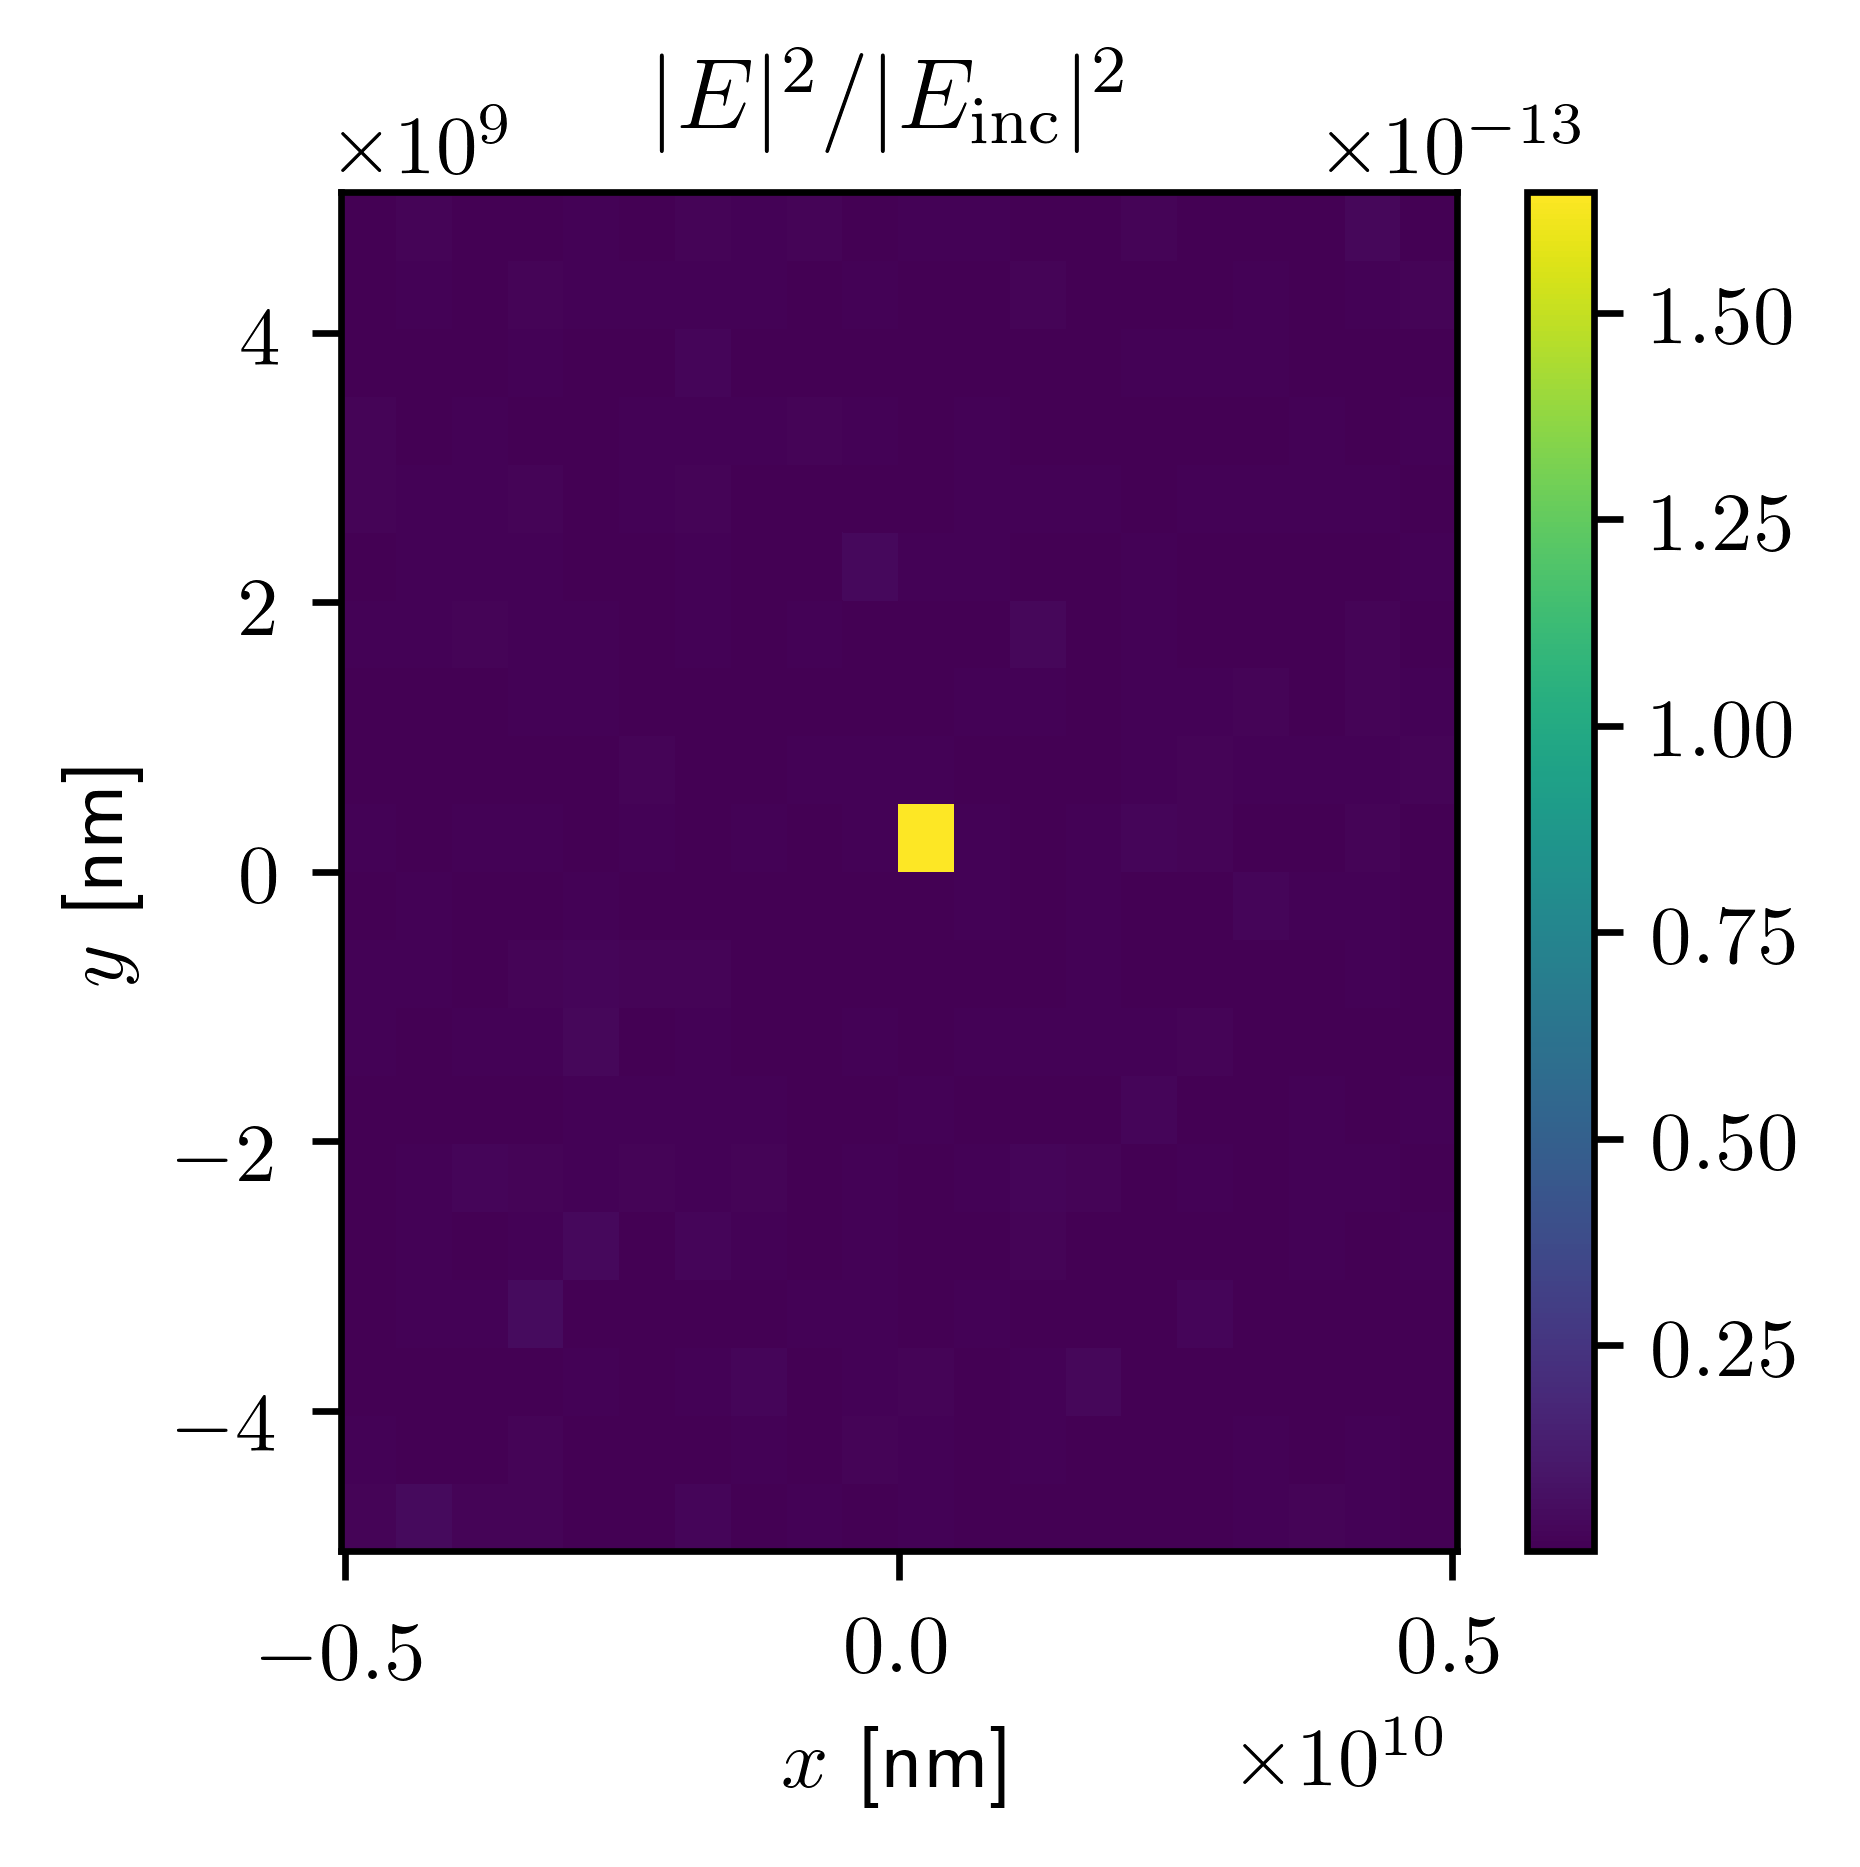

In [16]:
sim_inst.plot_image(0)

In [17]:
noisy_images = sim_inst.make_image_noisy(10**3)

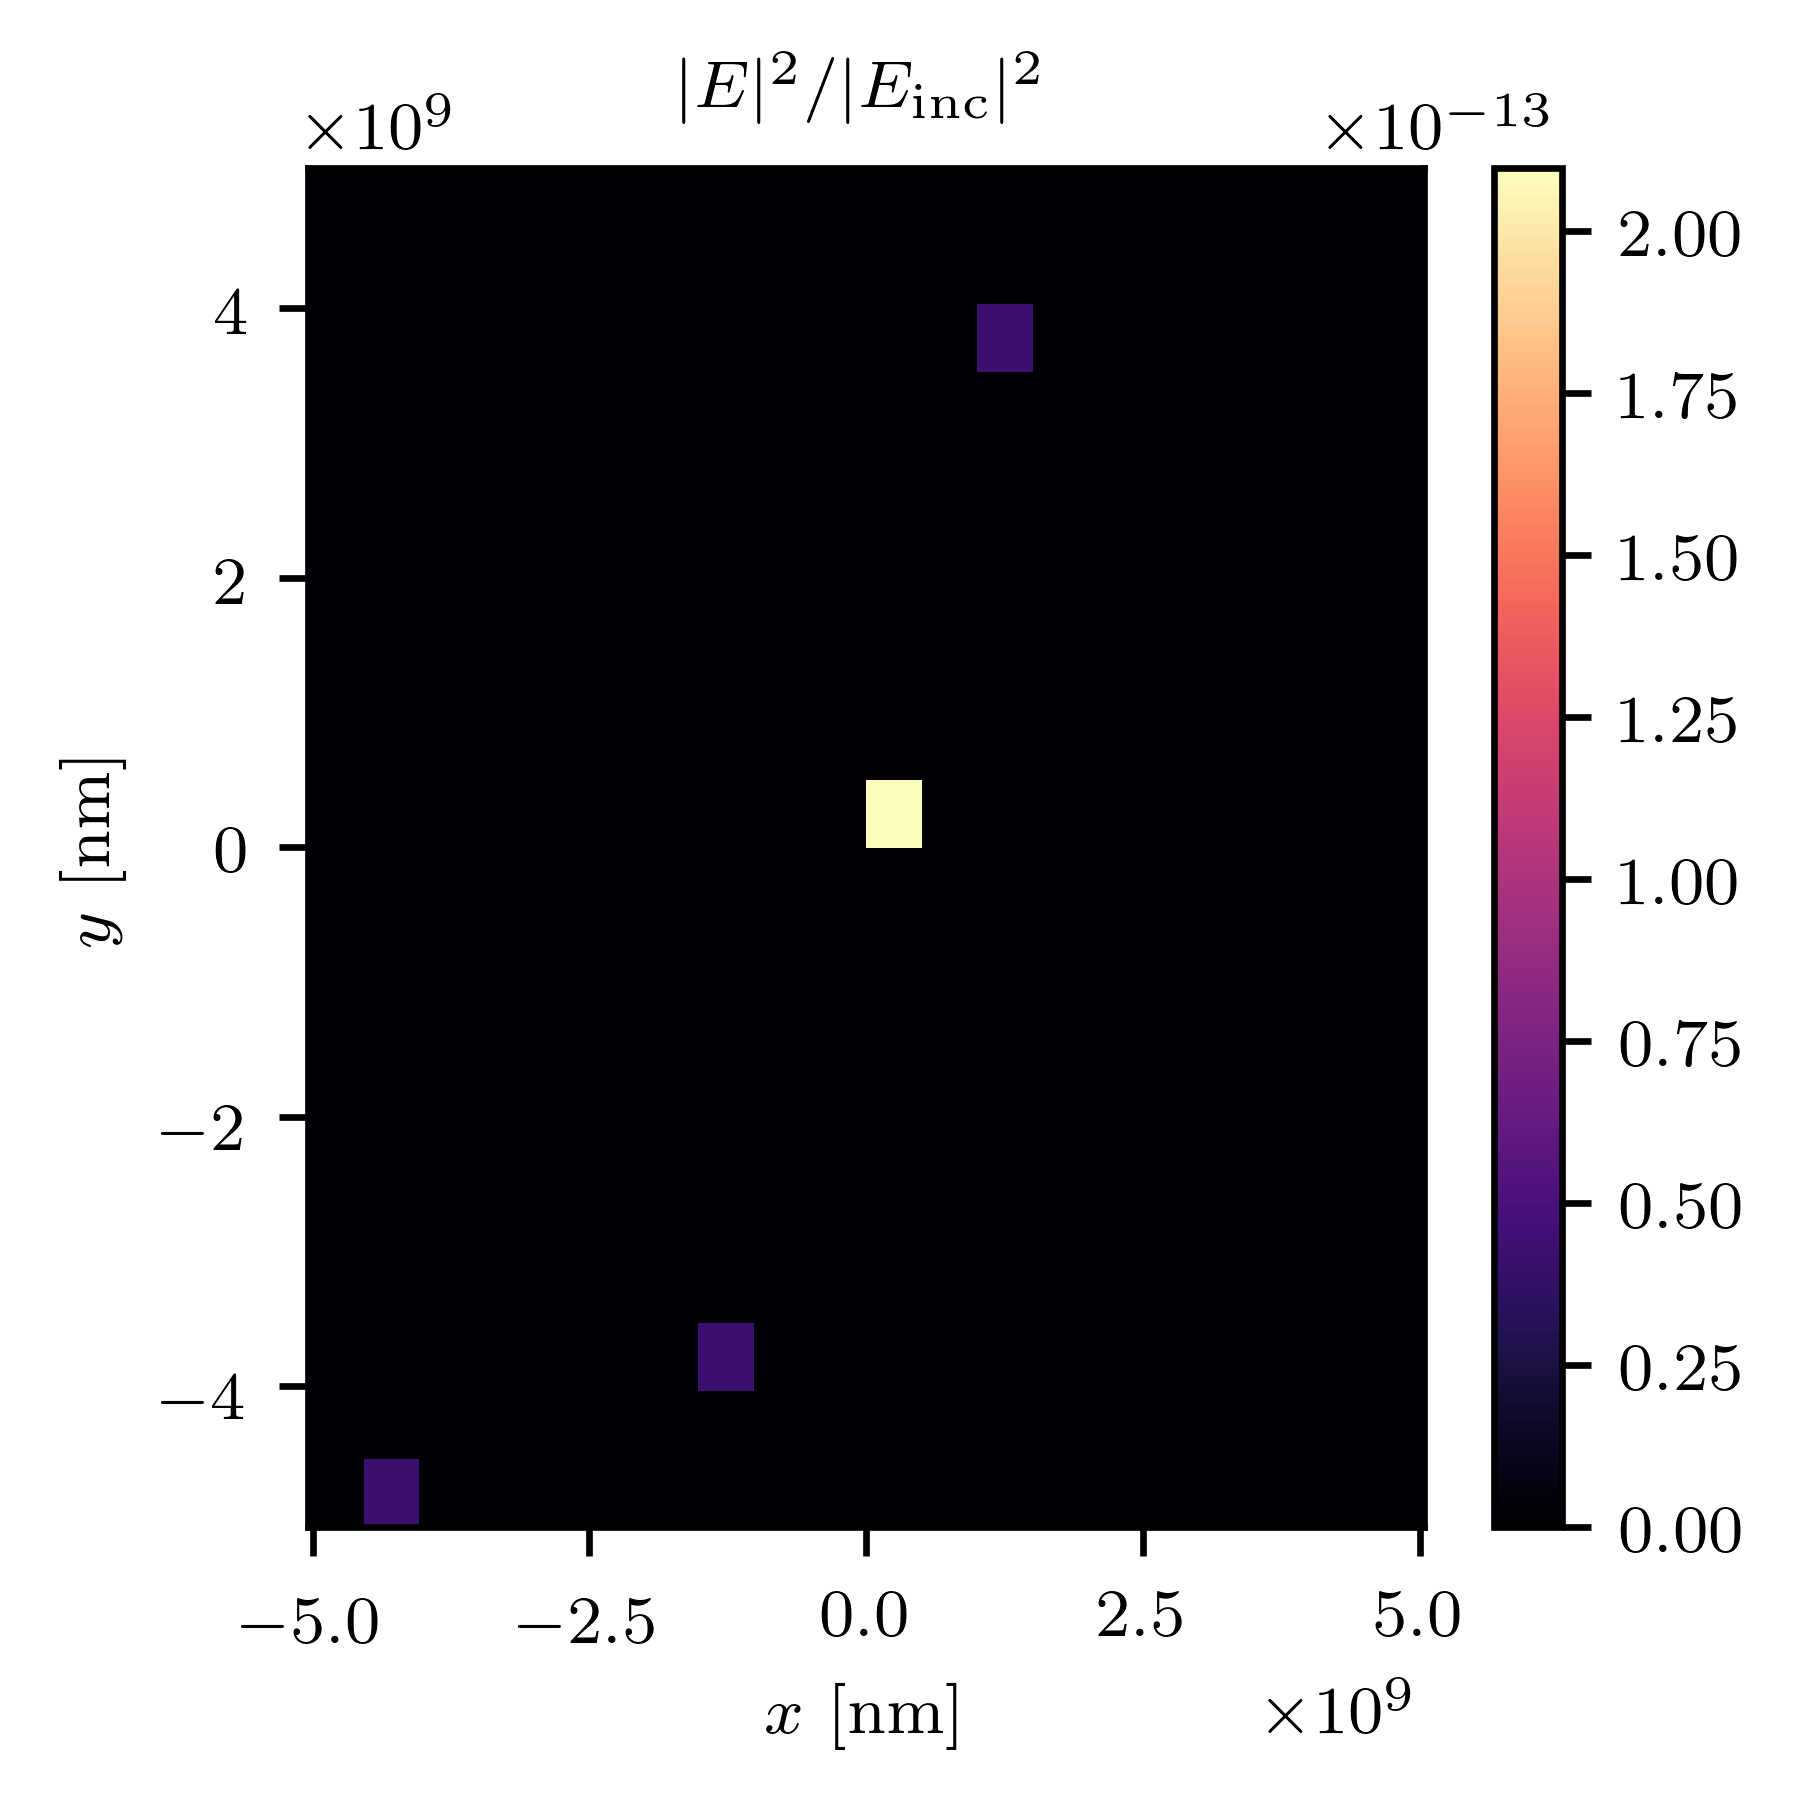

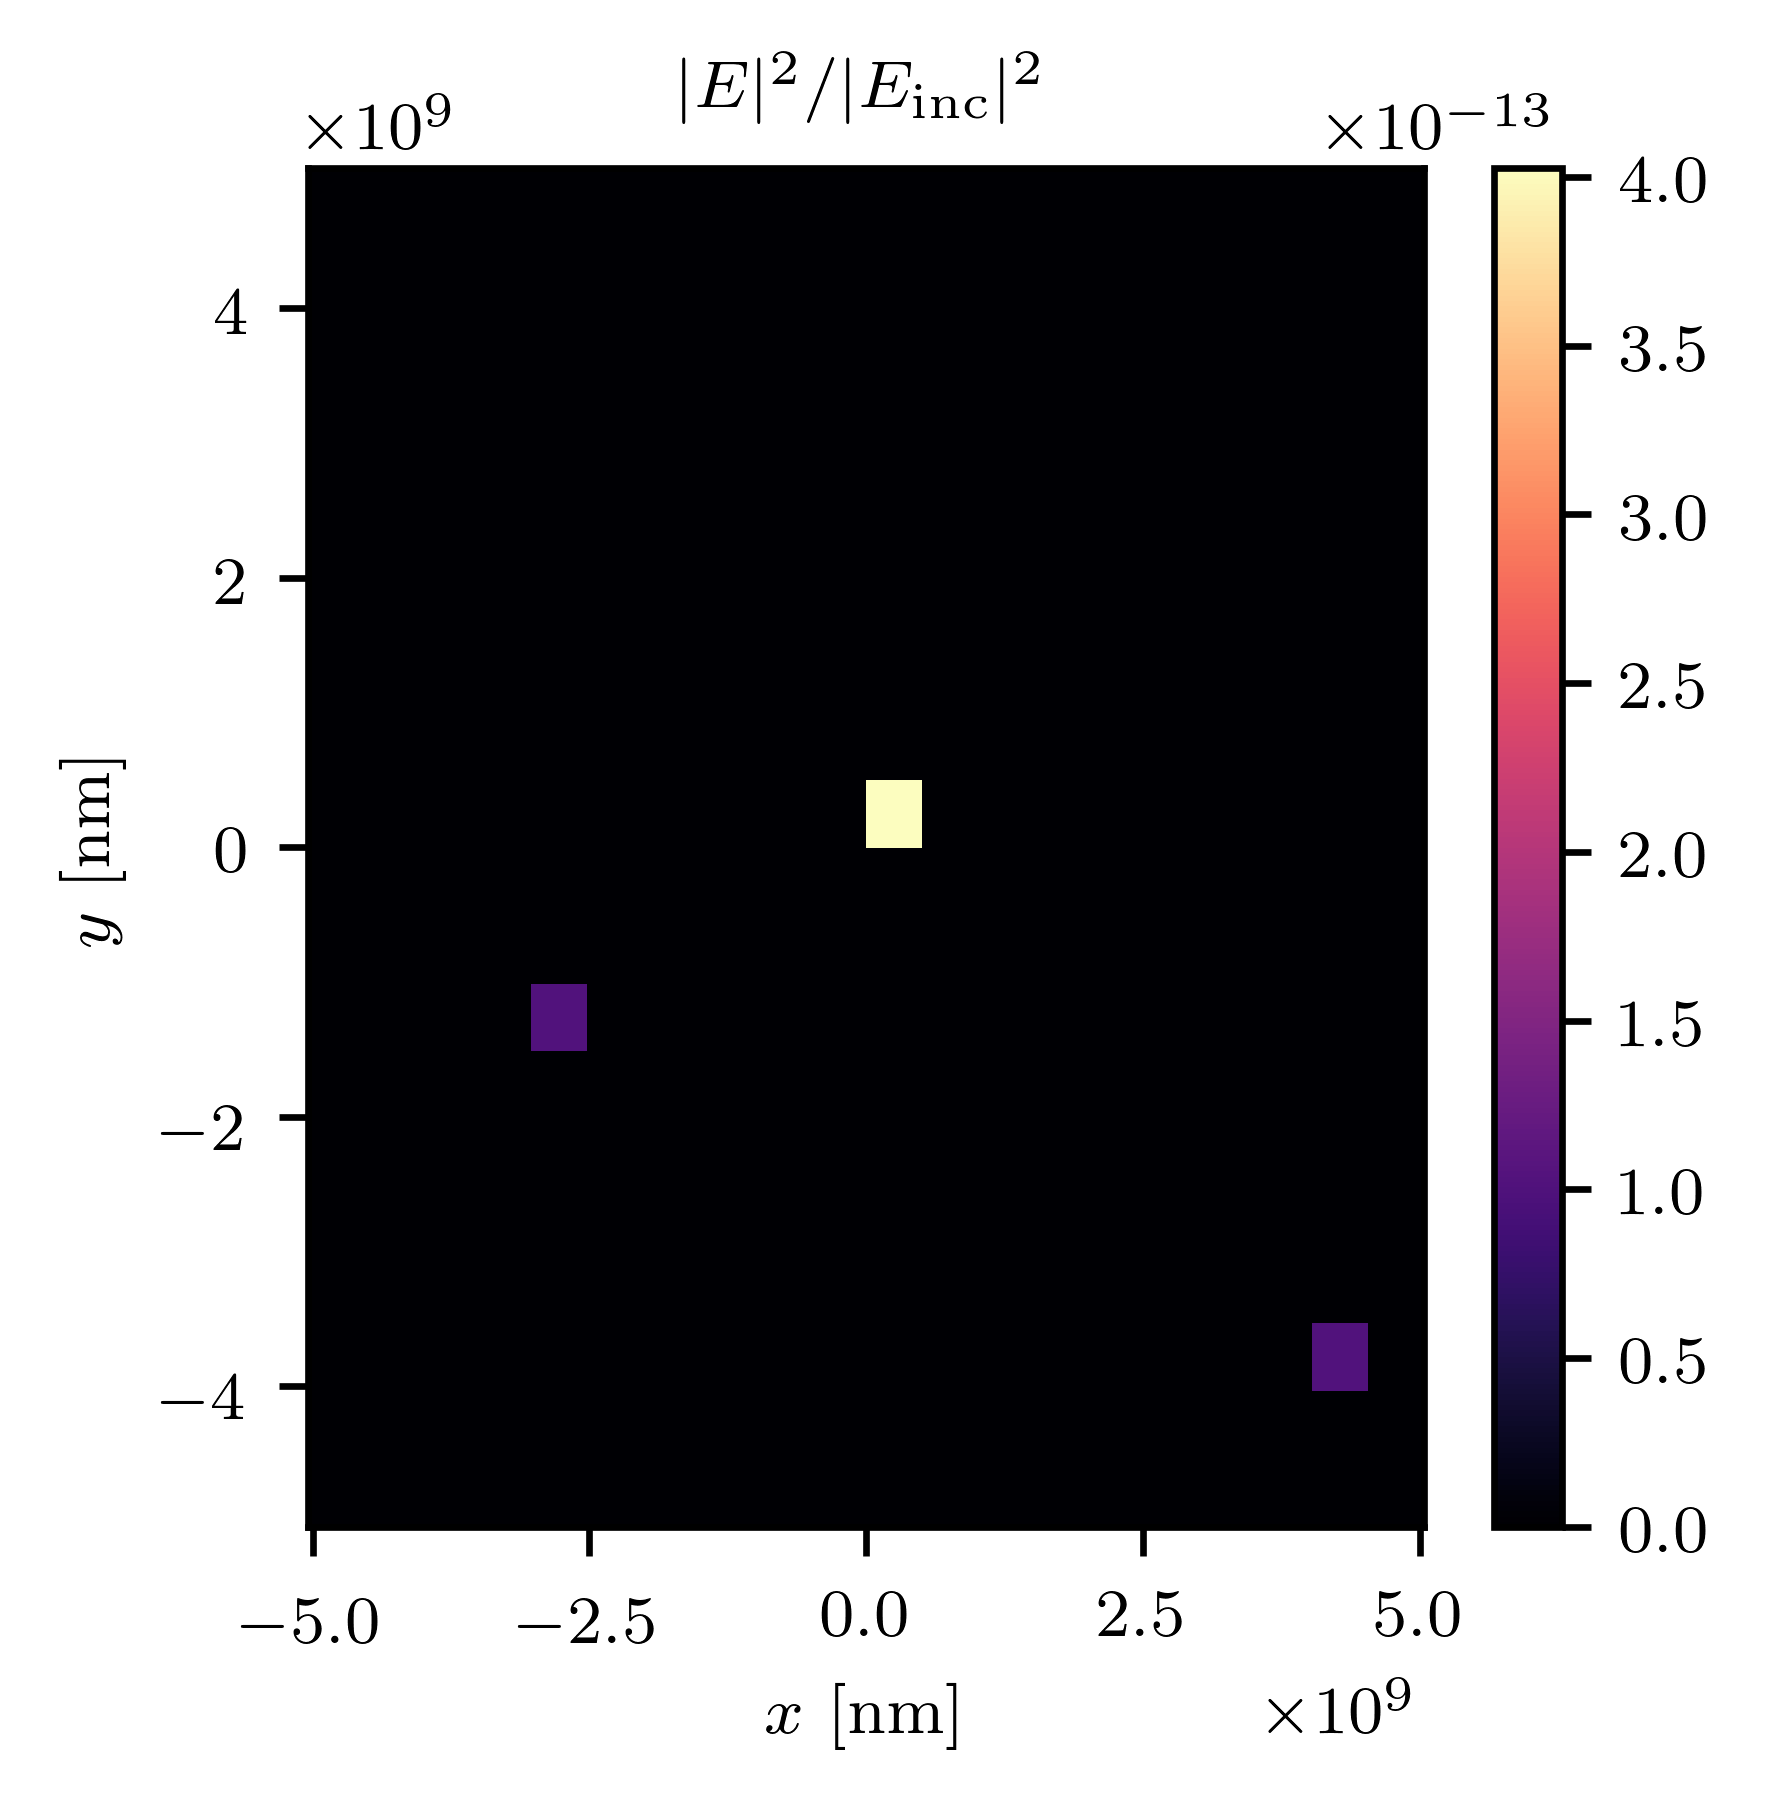

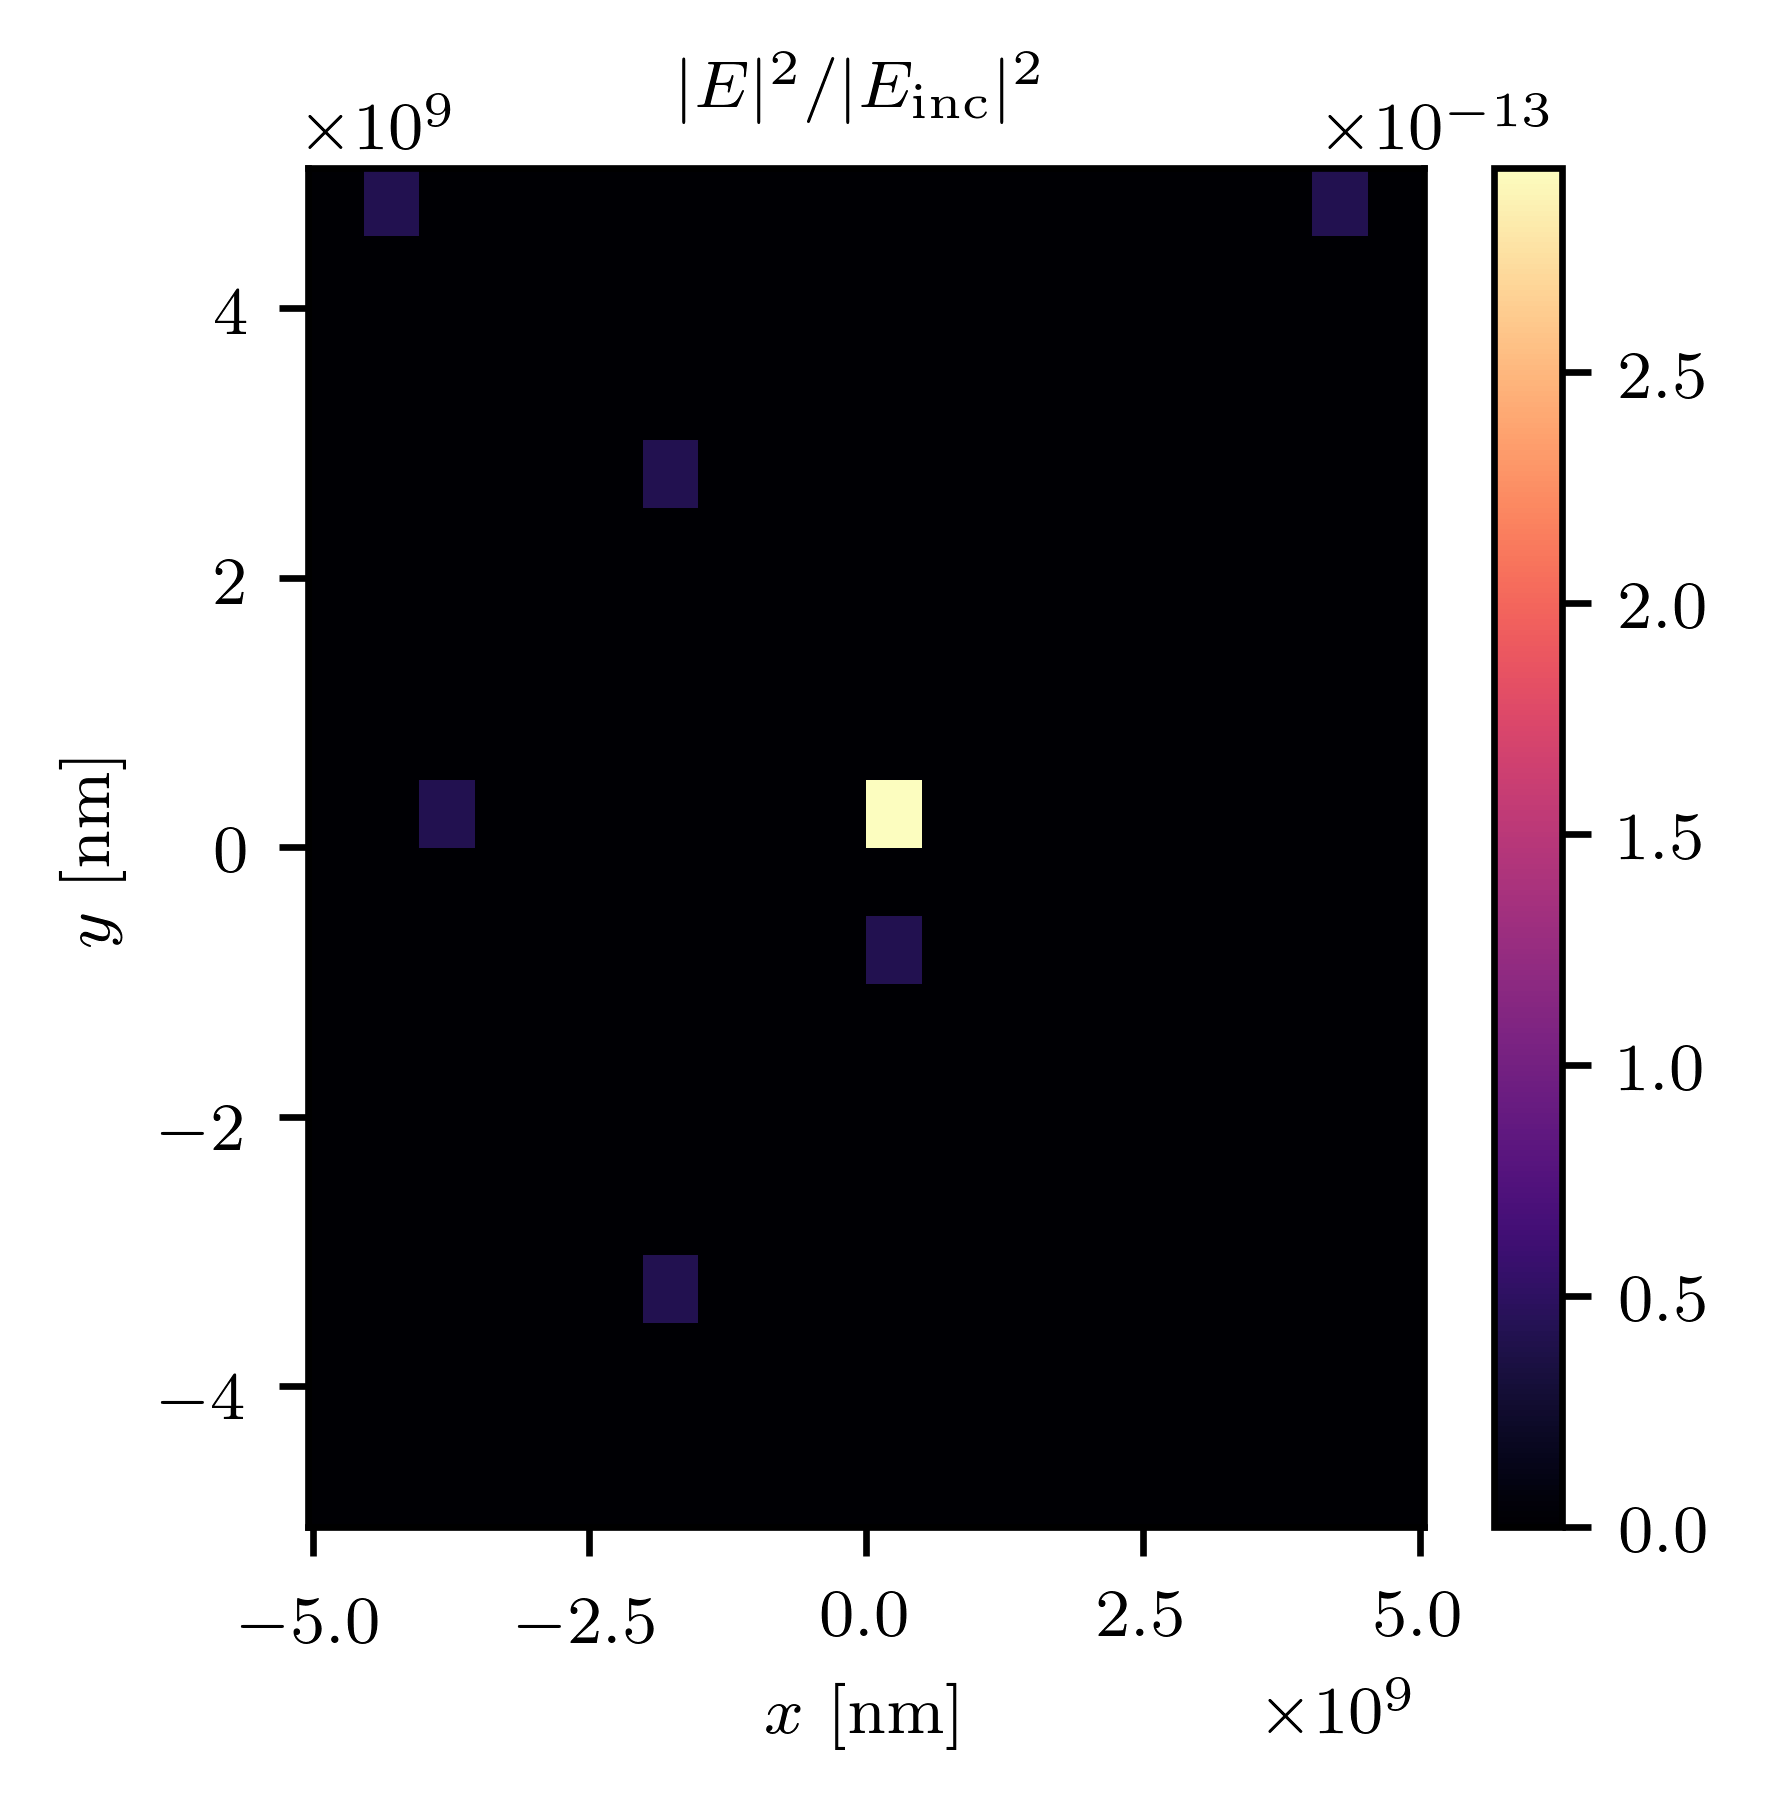

In [108]:
for i in noisy_images:
    plot_image(sim_inst, i)

In [19]:
# Model fit
# Gaussian guess, checked

test_BEM_fit_instance_few_mol_h_100 = fit.FitModelToData(
    simTestInst_few_mol_h_100.BEM_images, 
#     ini_guess=simTestInst_few_mol.mol_locations,
    ini_guess='gauss'
    )
test_BEM_fit_few_mol_h_100 = test_BEM_fit_instance_few_mol_h_100.fit_model_to_image_data(
    check_ini=True)

## Plot fit results
test_BEM_fit_instance_few_mol_h_100.plot_fit_results_as_quiver_map(simTestInst_few_mol_h_100)   

NameError: name 'simTestInst_few_mol_h_100' is not defined

## Load Curly's image files

In [20]:
import scipy.io as sio

In [21]:
mat_images = sio.loadmat(
    "/Users/chair/Documents/Academia/SuperRes/Biteen_colab/"+
    "from_Biteen_group/rerecoverthelocalization/mov_006_molecule_img_good.mat"
    )

In [22]:
mat_images.keys()

dict_keys(['__header__', '__version__', '__globals__', 'bg_img', 'bgsub_img', 'raw_img'])

In [96]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

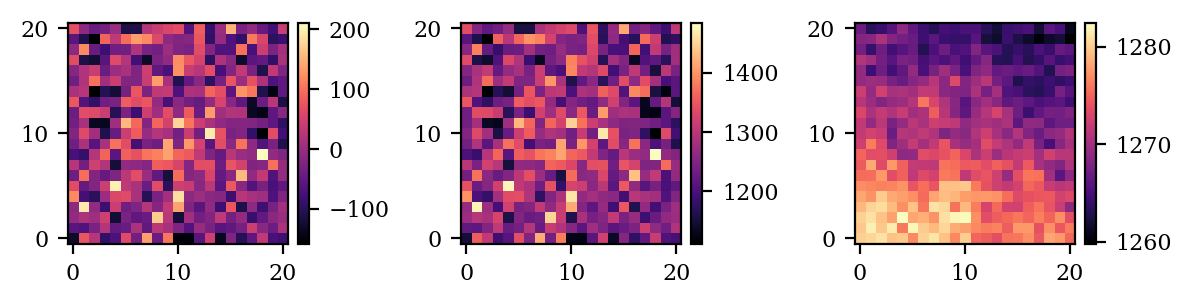

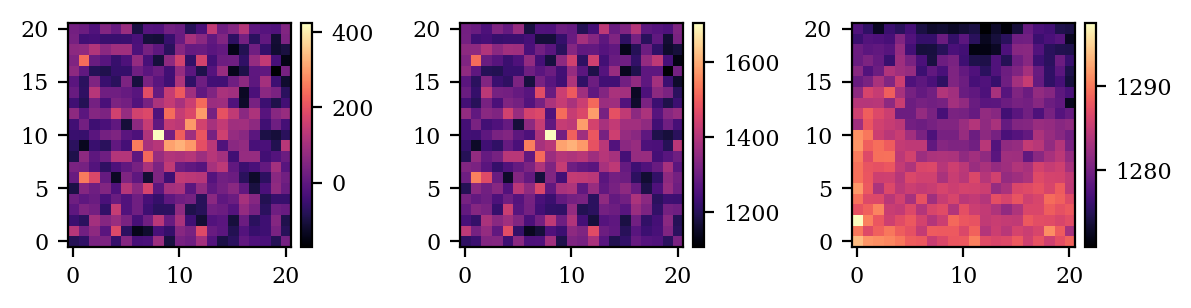

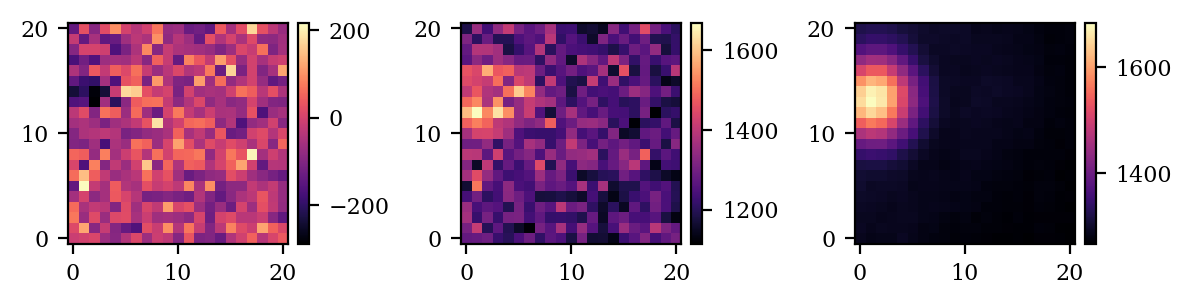

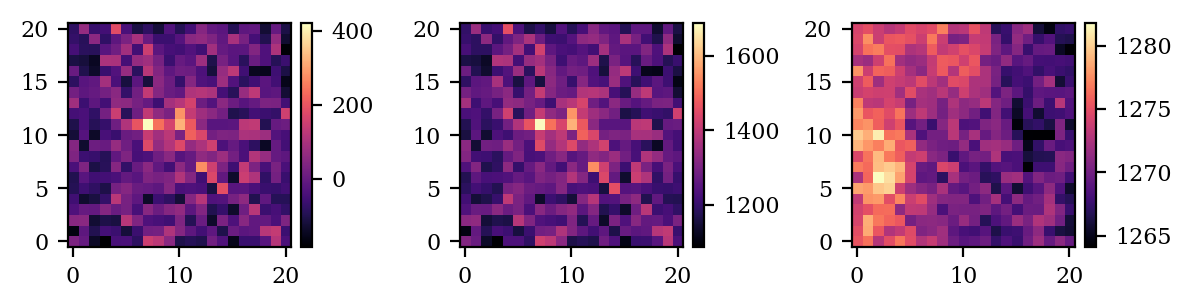

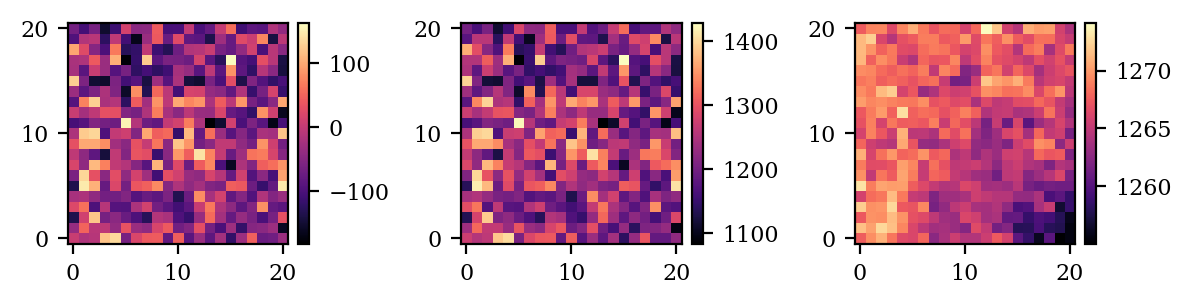

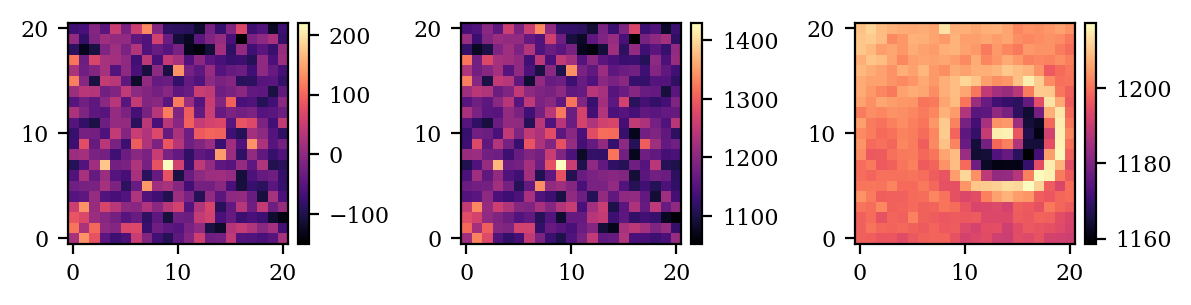

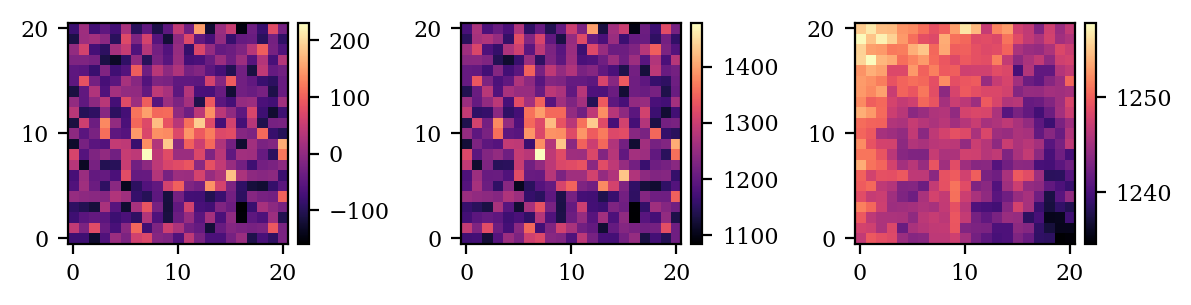

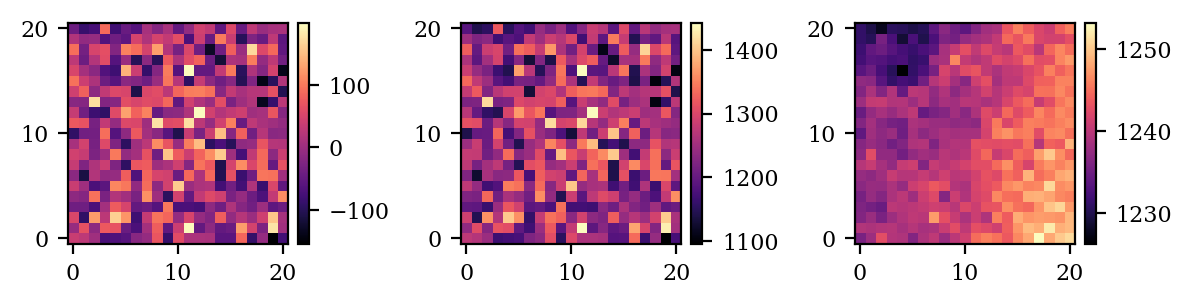

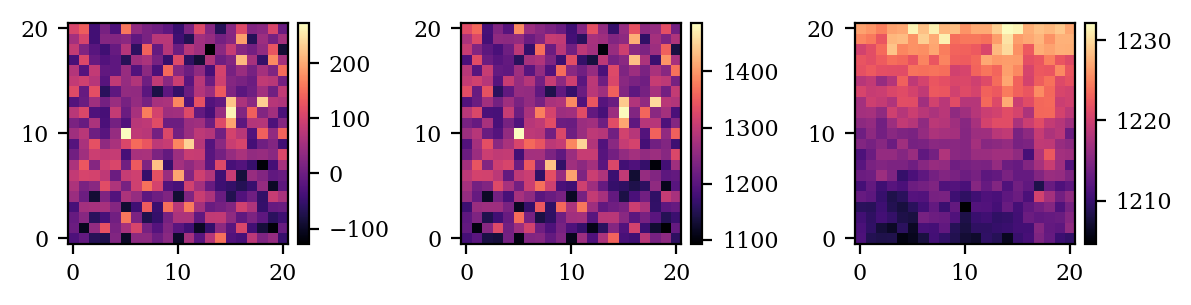

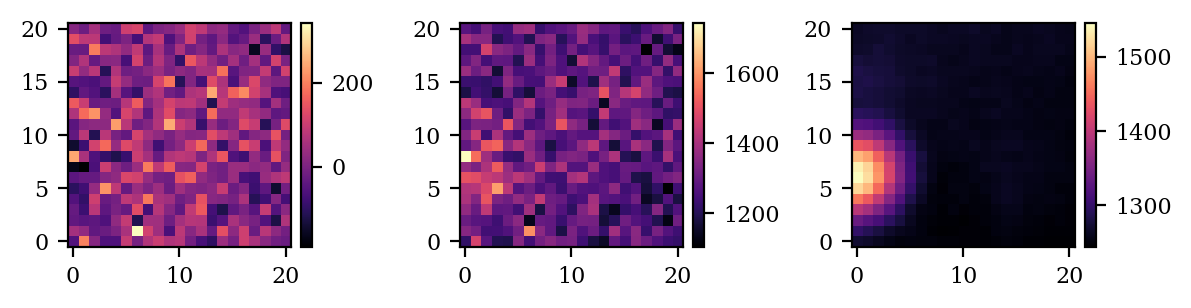

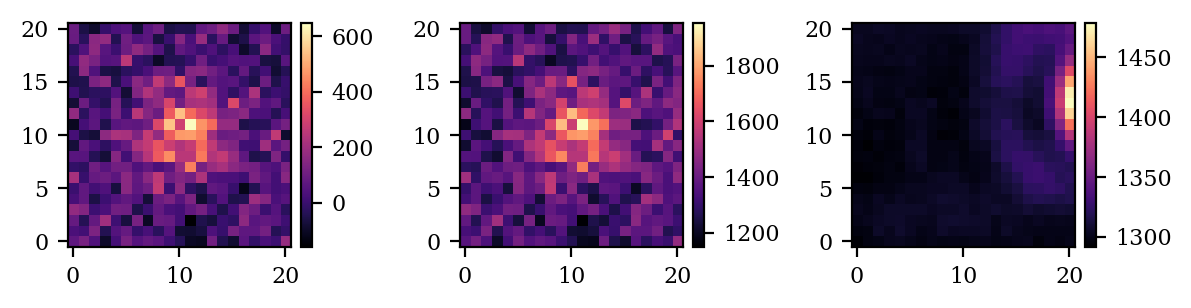

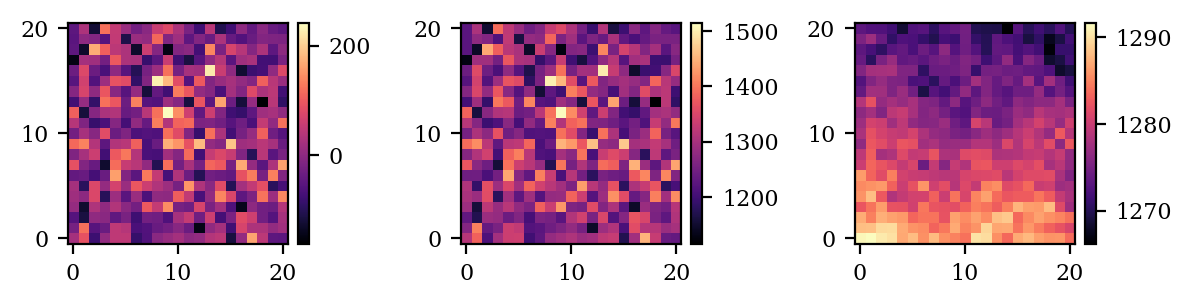

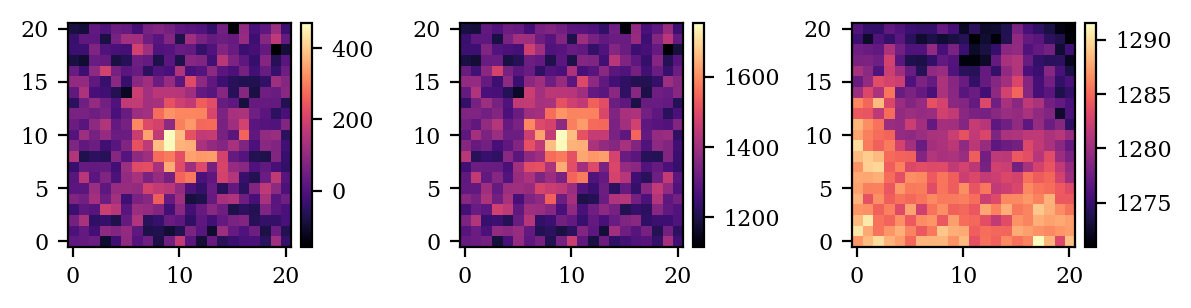

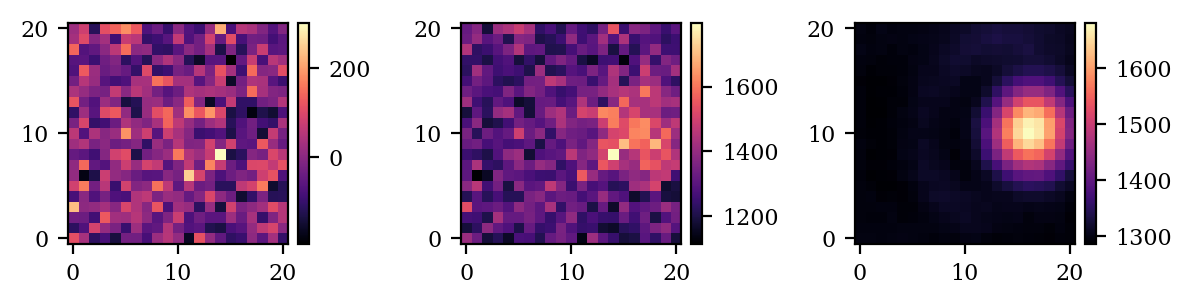

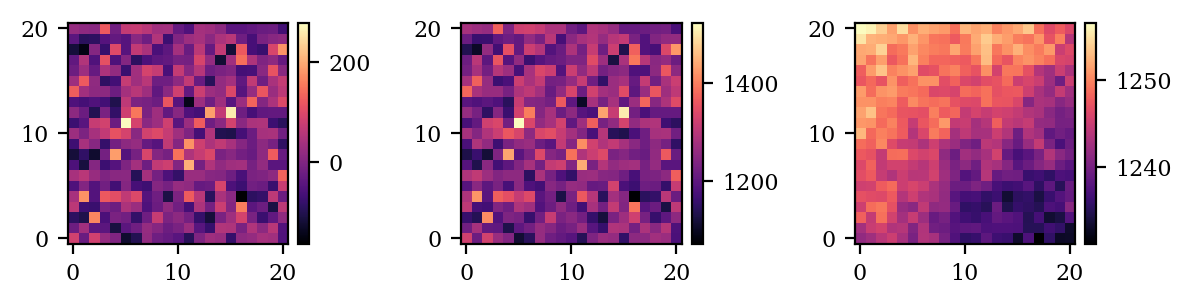

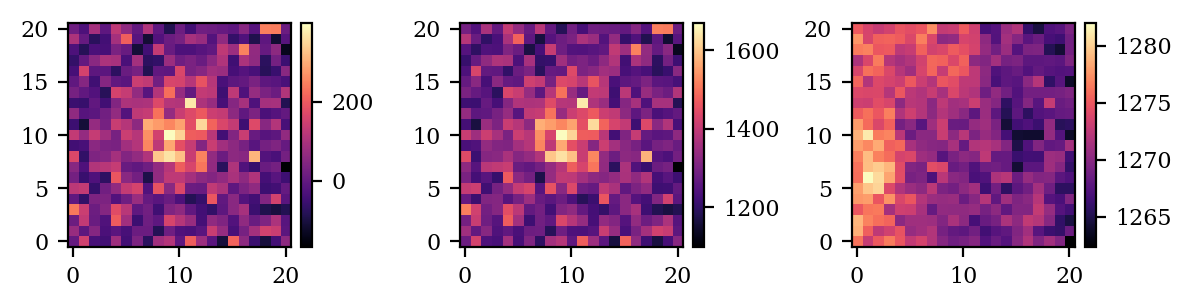

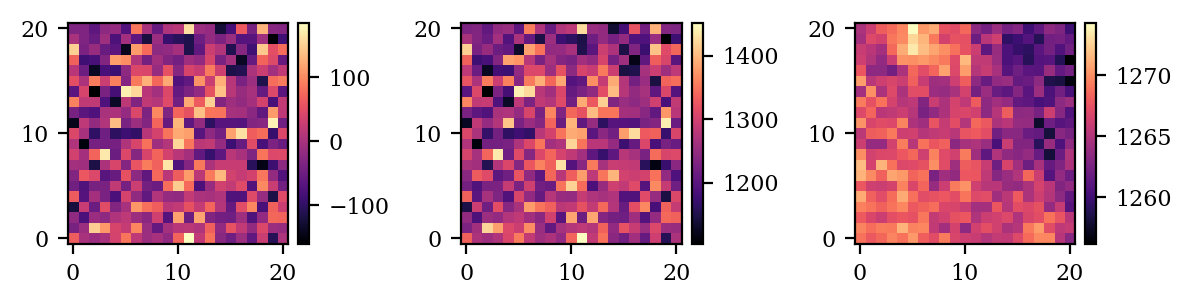

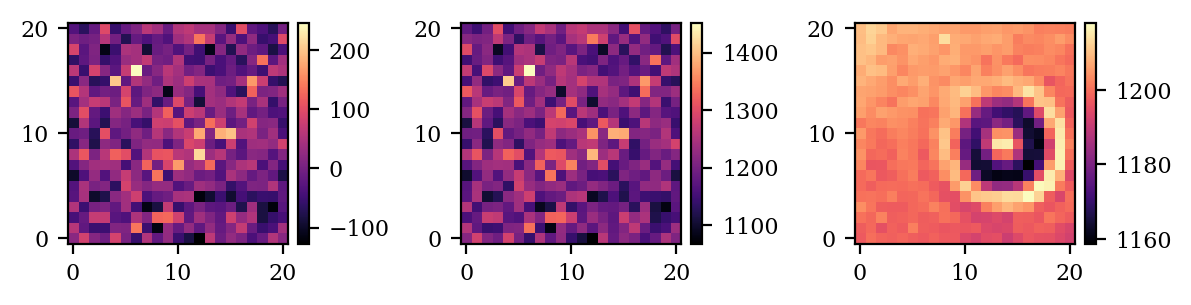

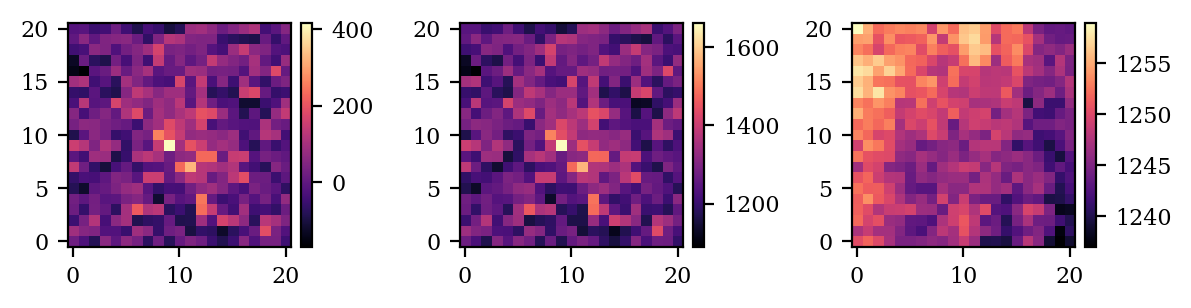

In [114]:

for i in range(1,20,1):

    fig, axs = plt.subplots(
        ncols=3,
        dpi=200,
        figsize=(6,2)
        )
    
    for ax_idx, name in zip(
        [0,1,2], ["bgsub_img", "raw_img", "bg_img"]):

        img1 = axs[ax_idx].imshow(mat_images[name][...,i])
        divider = make_axes_locatable(axs[ax_idx])
        cax1 = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(img1, cax=cax1)
   
    plt.tight_layout(h_pad=1)
    

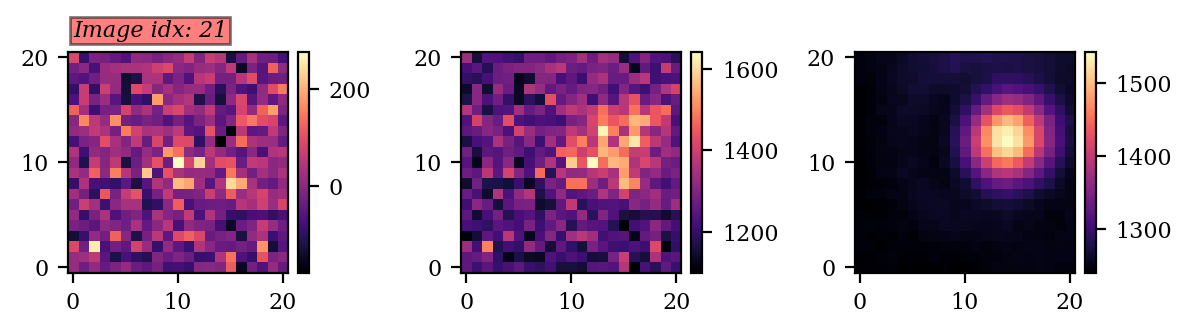

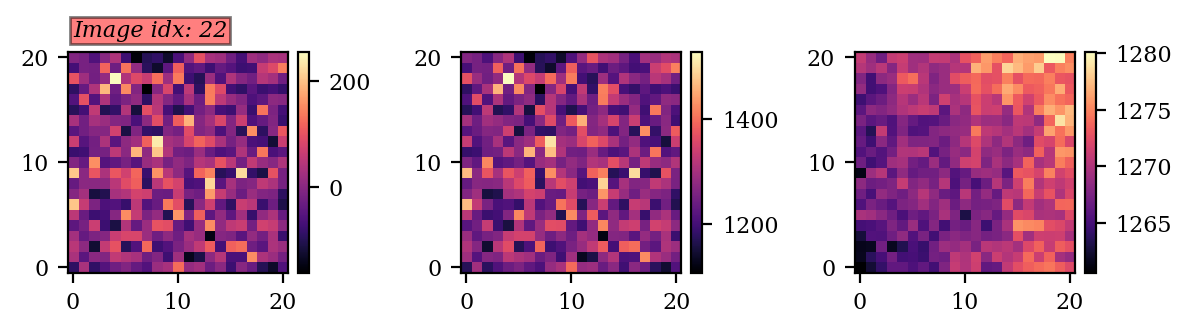

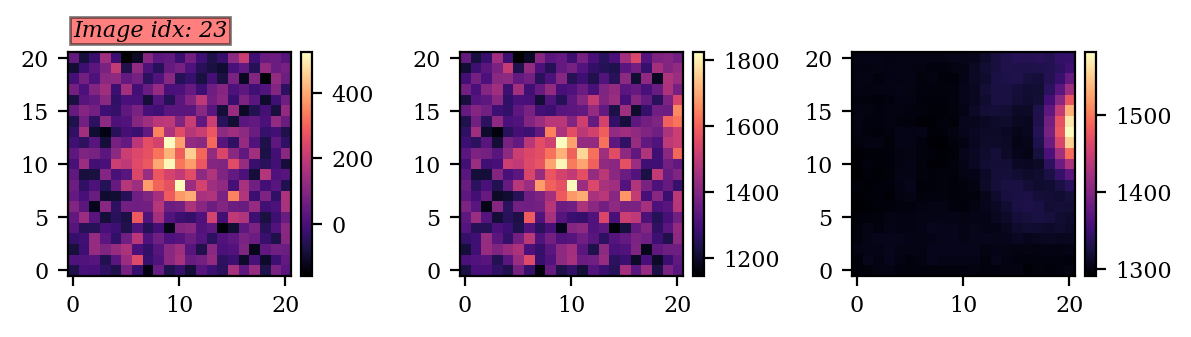

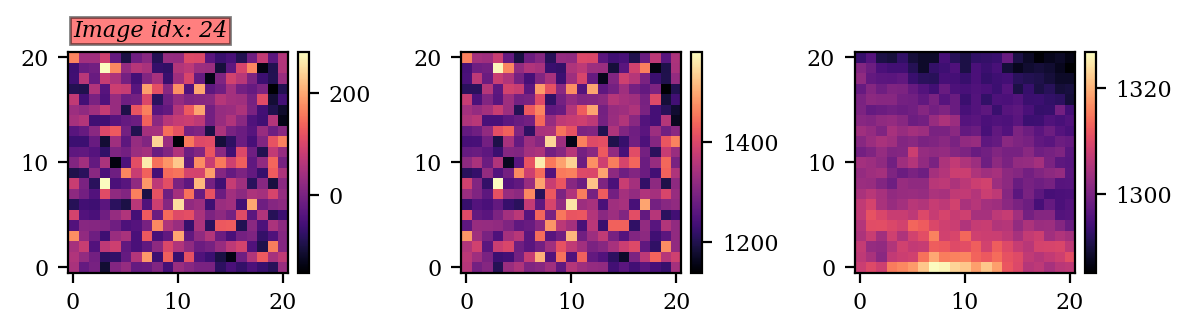

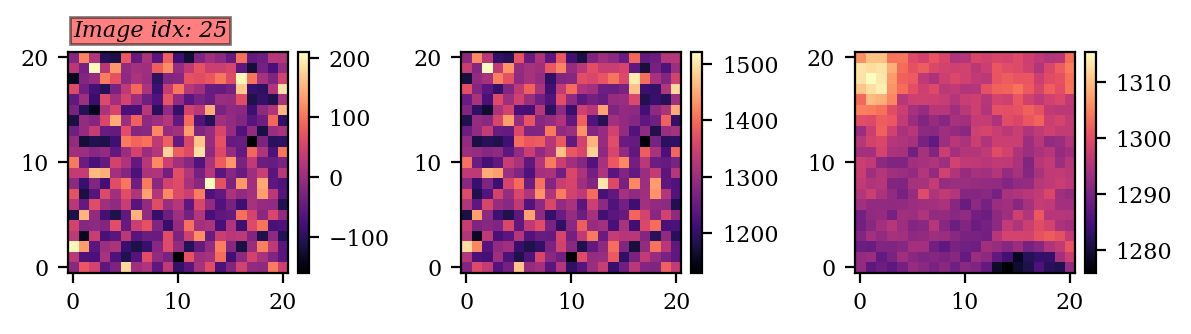

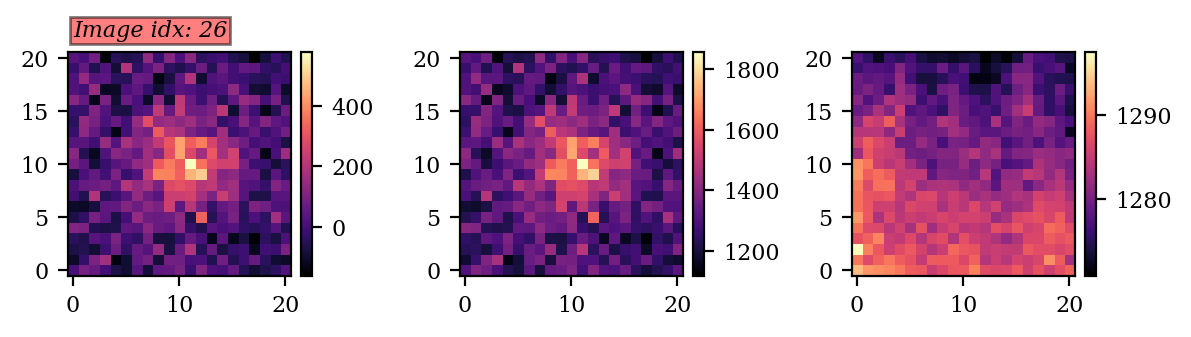

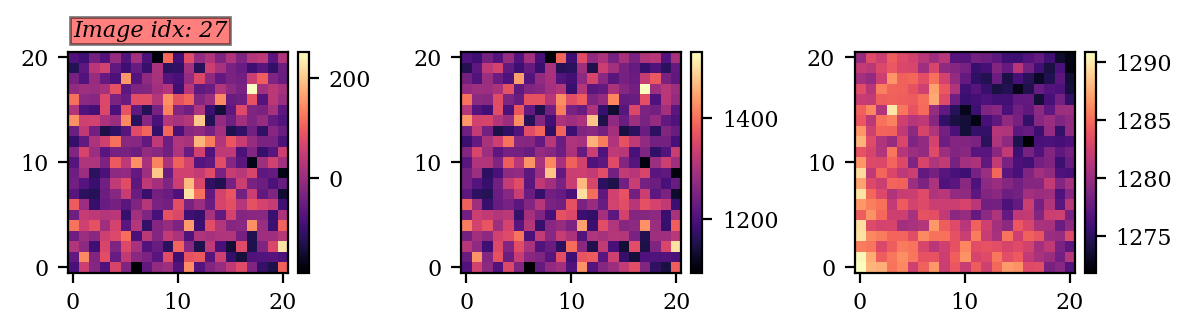

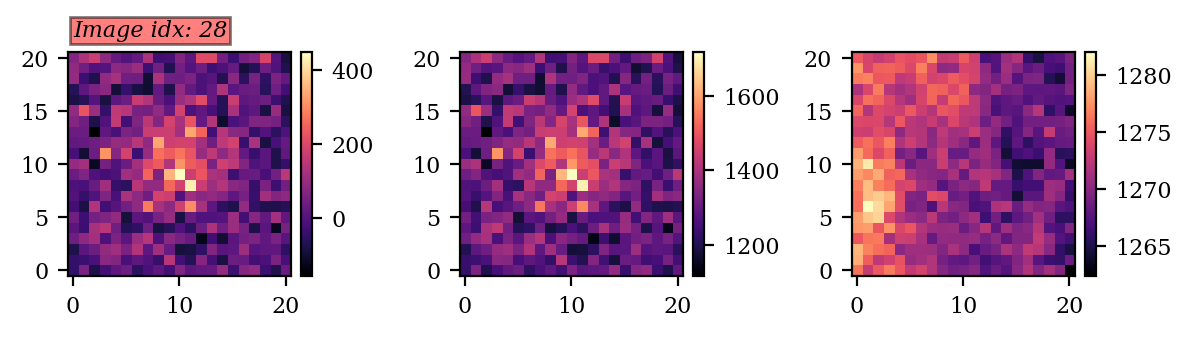

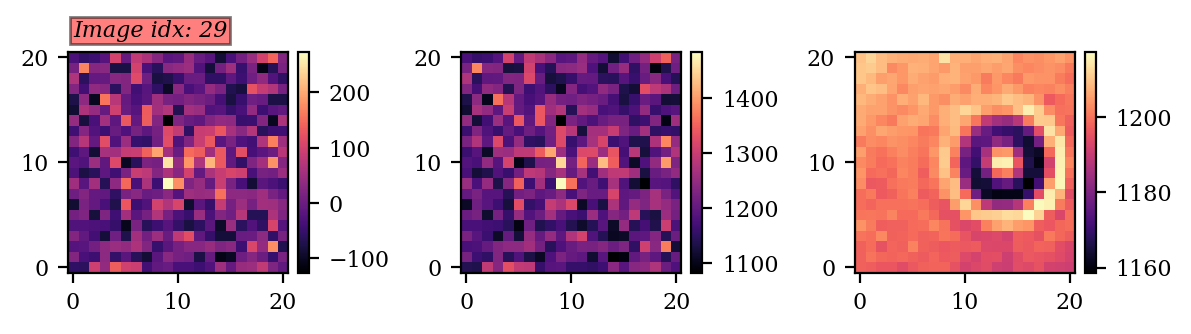

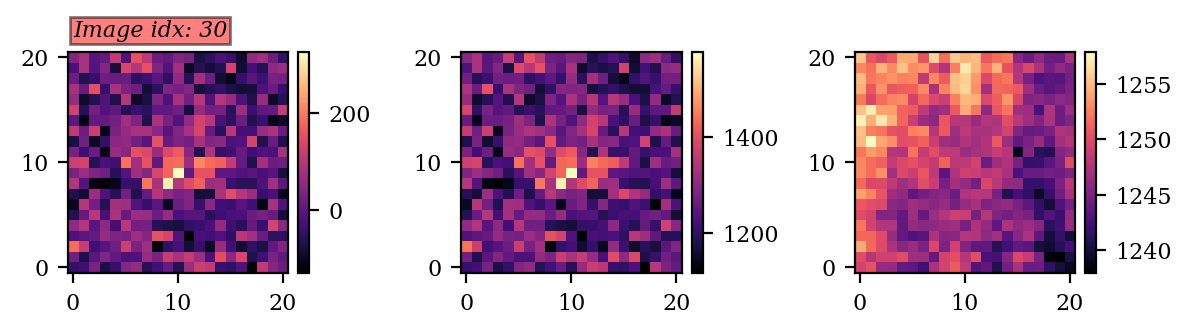

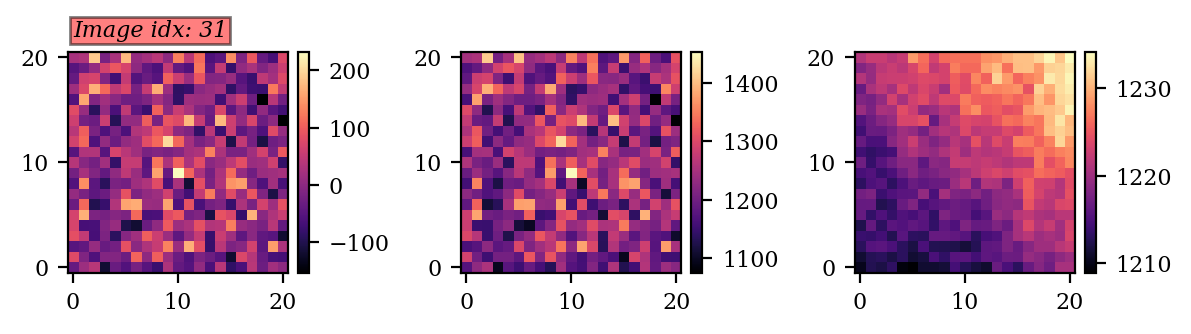

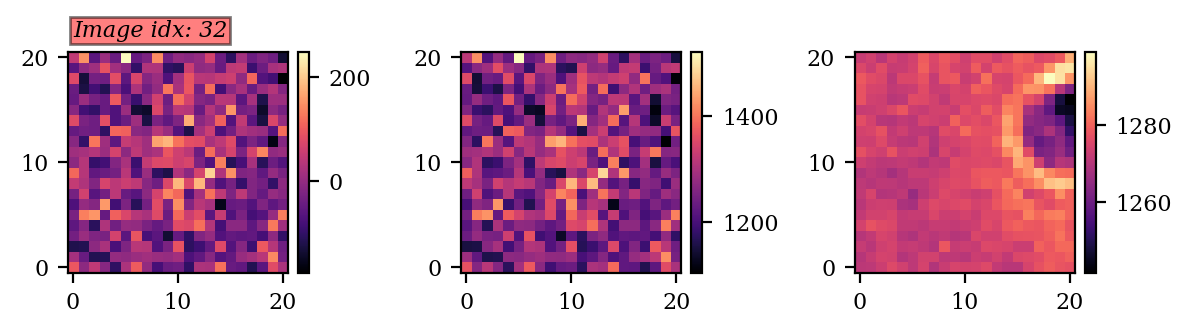

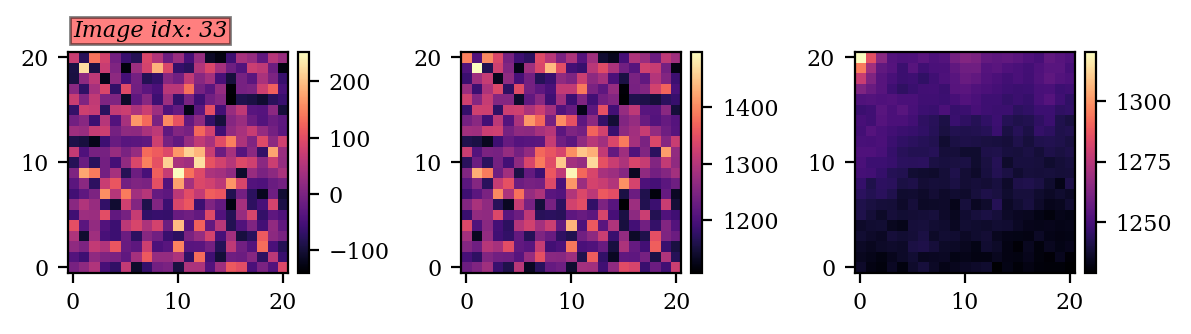

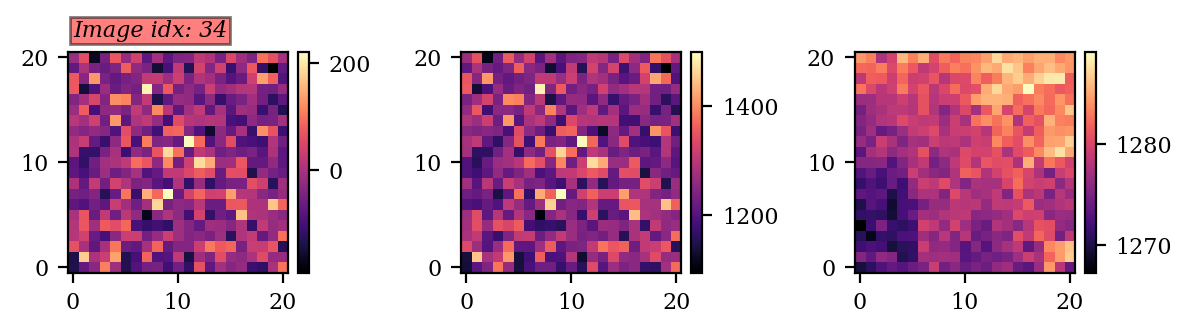

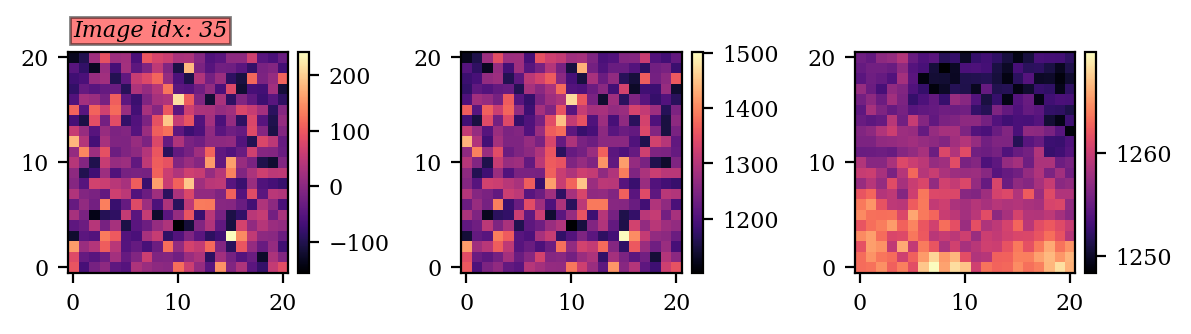

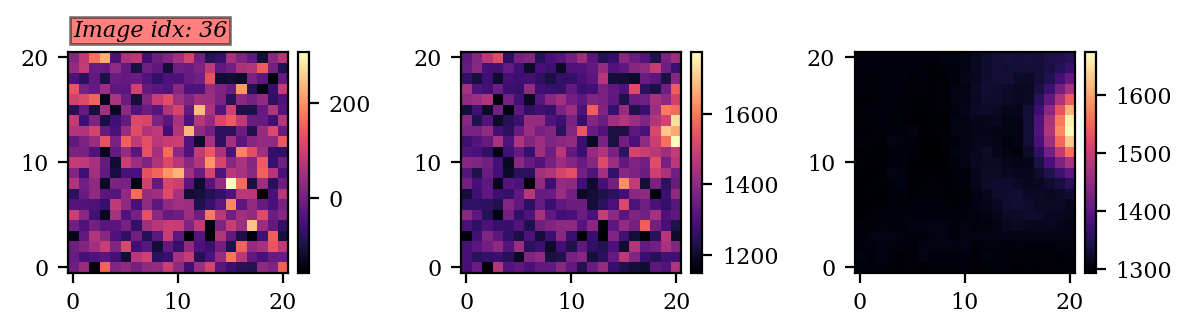

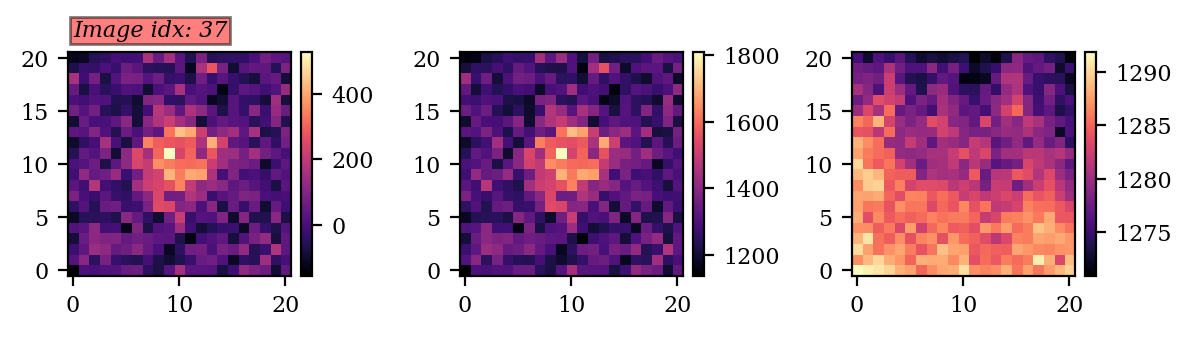

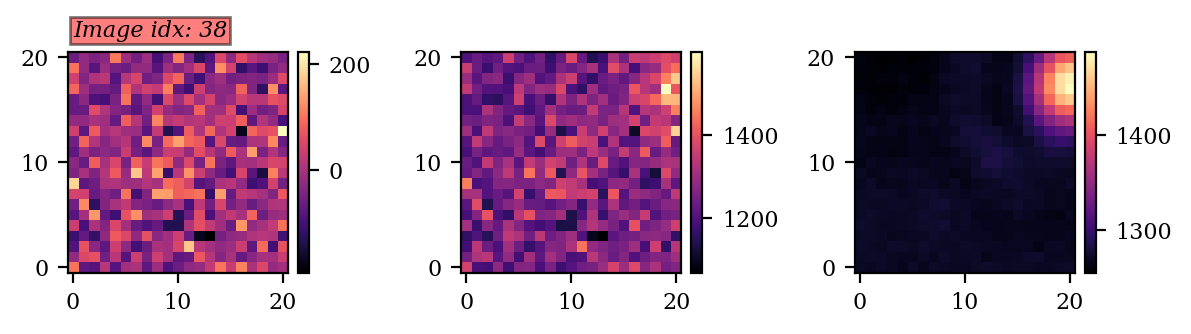

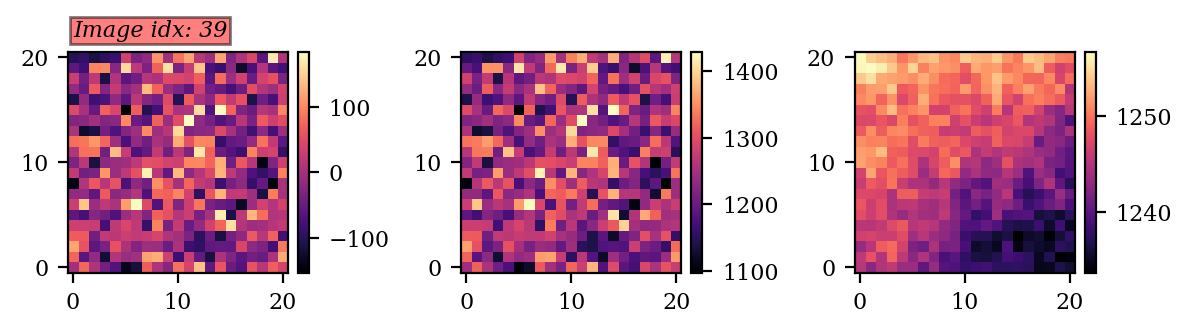

In [122]:

for i in range(21,40,1):

    fig, axs = plt.subplots(
        ncols=3,
        dpi=200,
        figsize=(6,3)
        )
    
    for ax_idx, name in zip(
        [0,1,2], ["bgsub_img", "raw_img", "bg_img"]):

        img1 = axs[ax_idx].imshow(mat_images[name][...,i])
        if ax_idx is 0:
            axs[ax_idx].text(
                0, 22, f'Image idx: {i}', 
                style='italic',
                bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 1}
                   )
        ## Add colorbar
        divider = make_axes_locatable(axs[ax_idx])
        cax1 = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(img1, cax=cax1)
   
    plt.tight_layout(h_pad=1)
    

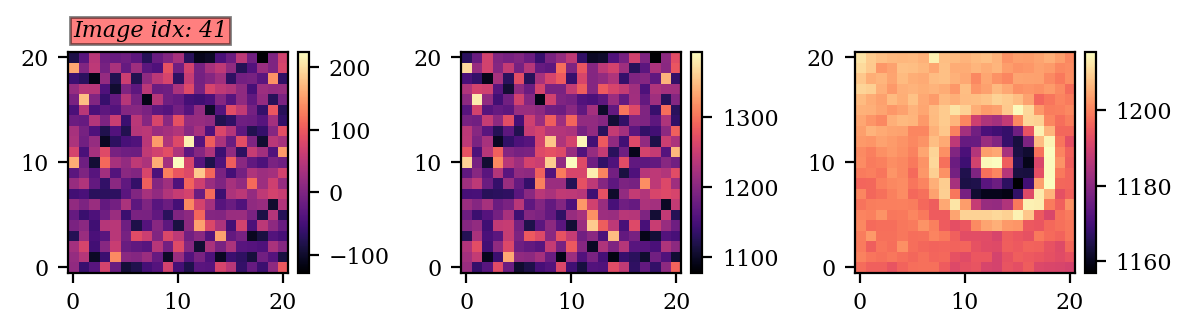

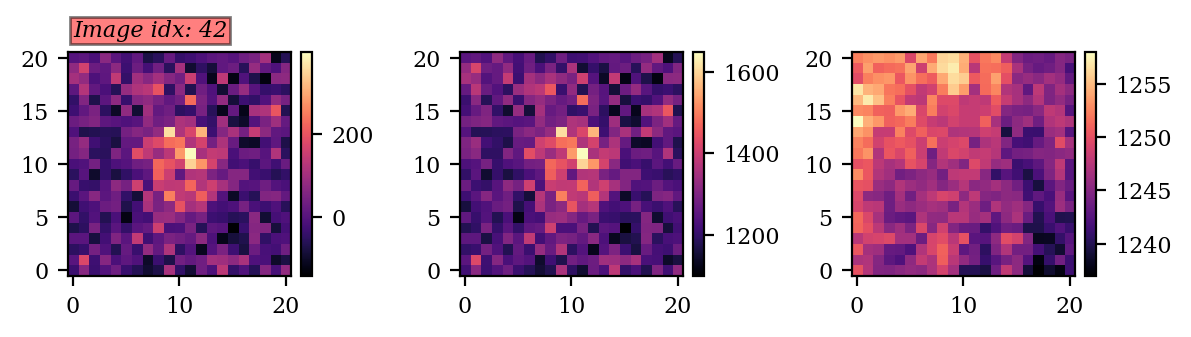

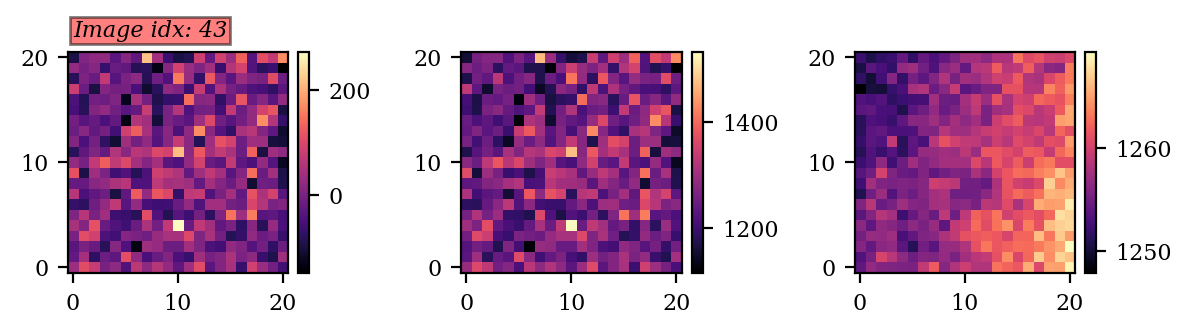

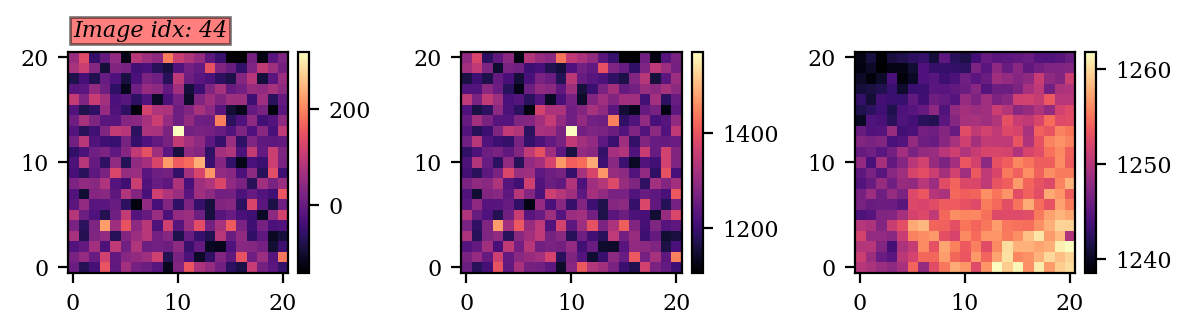

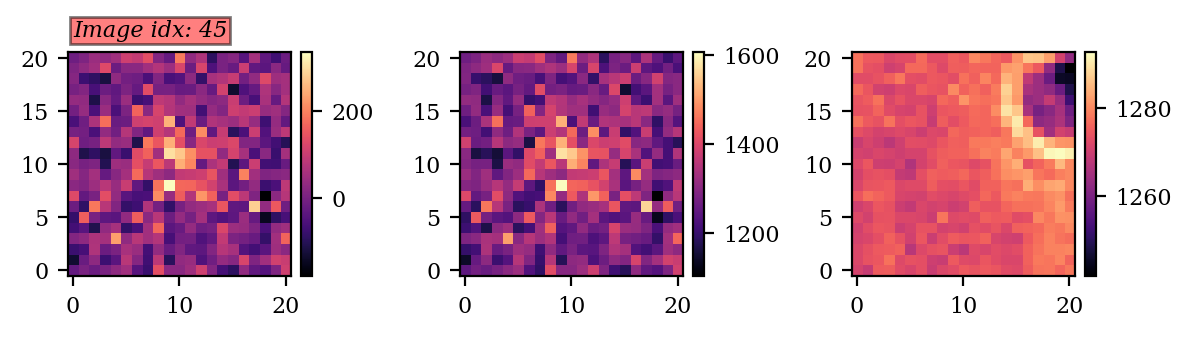

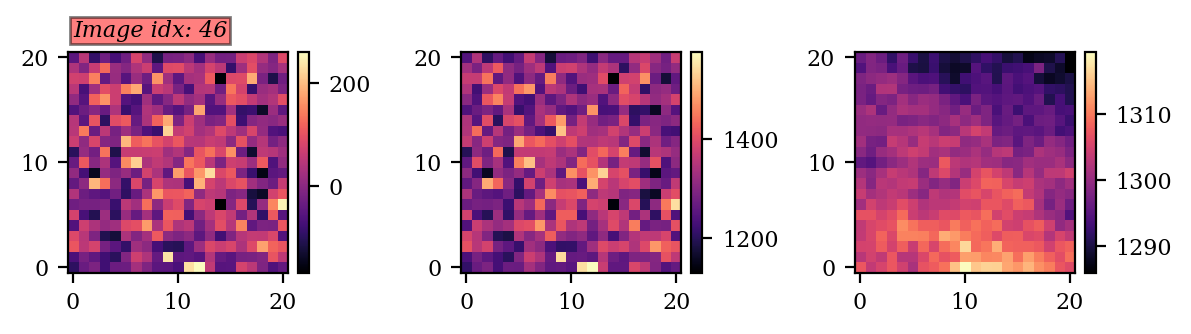

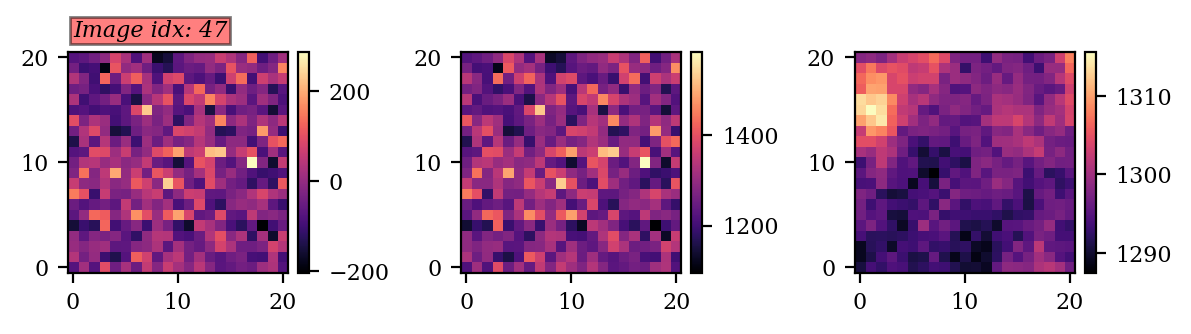

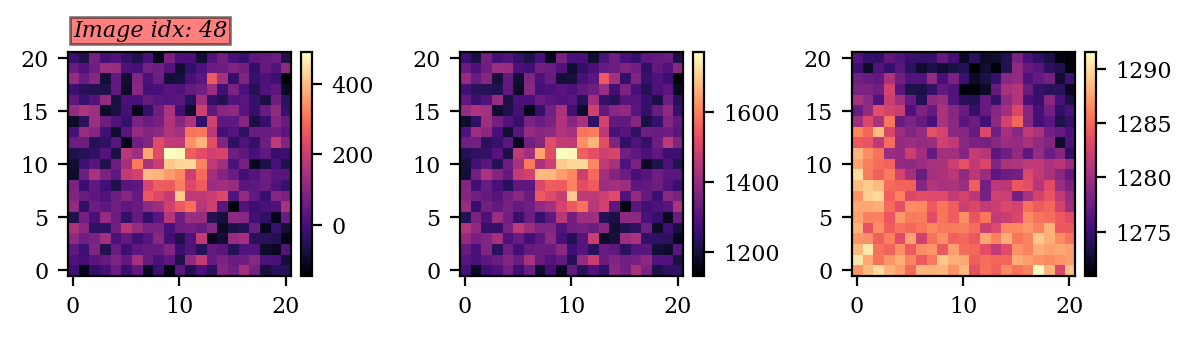

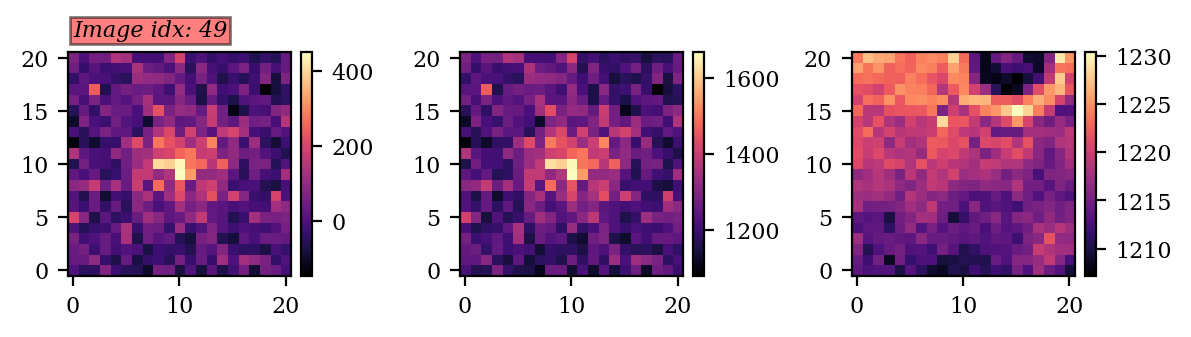

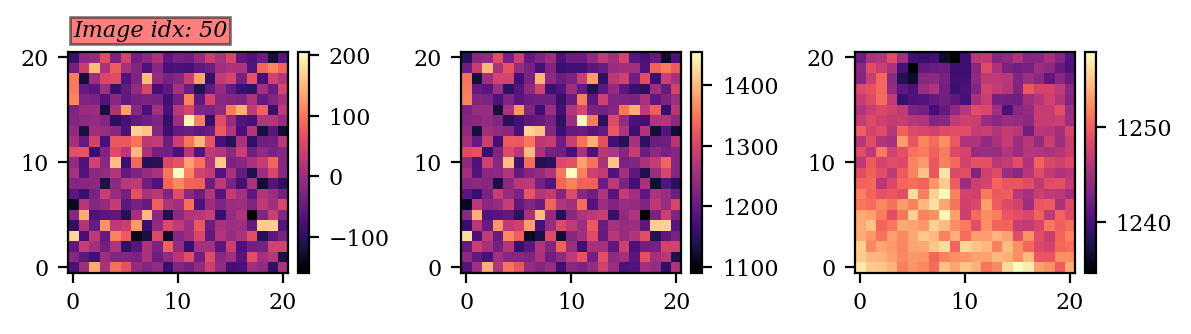

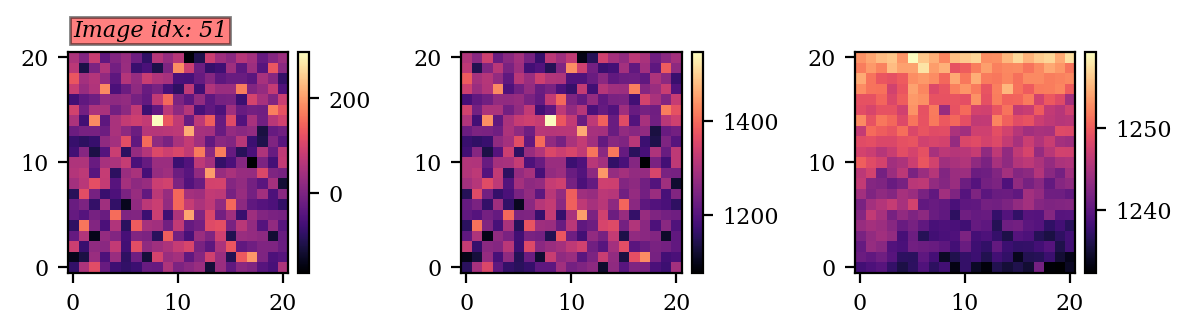

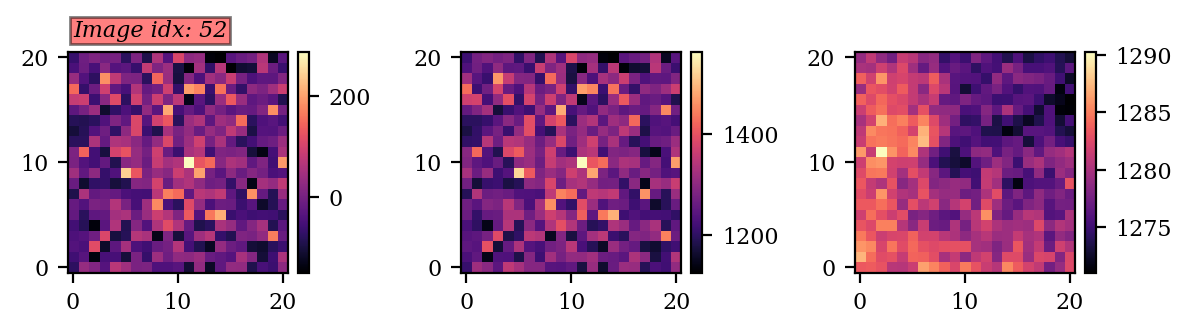

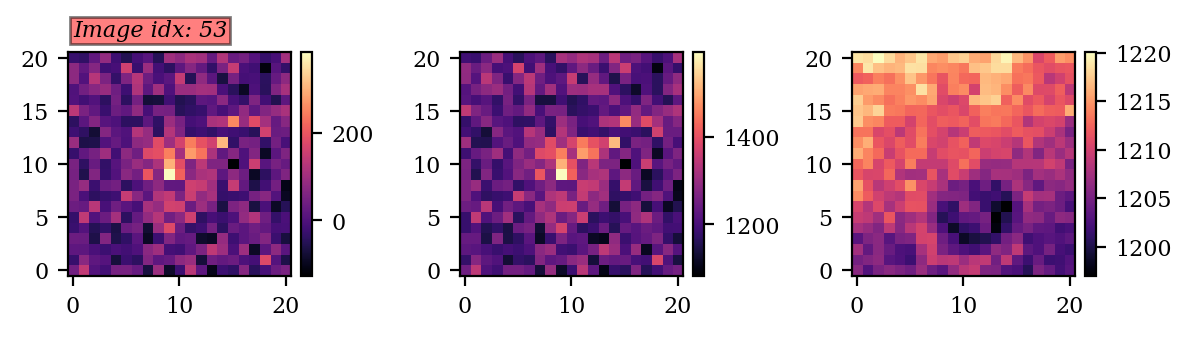

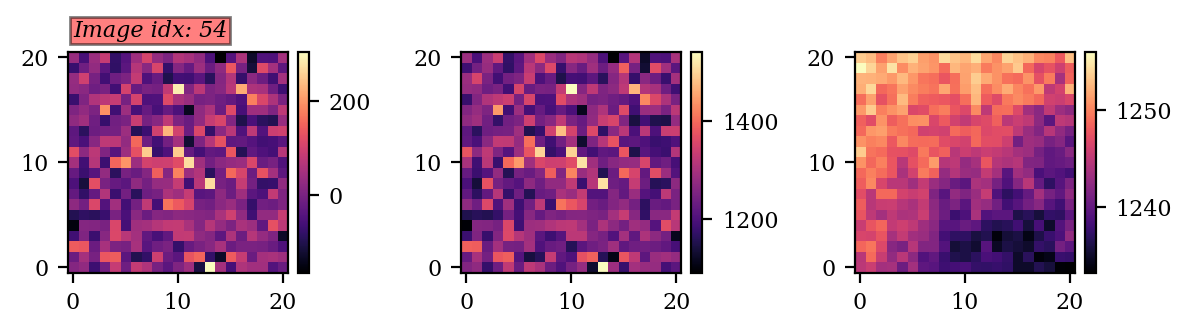

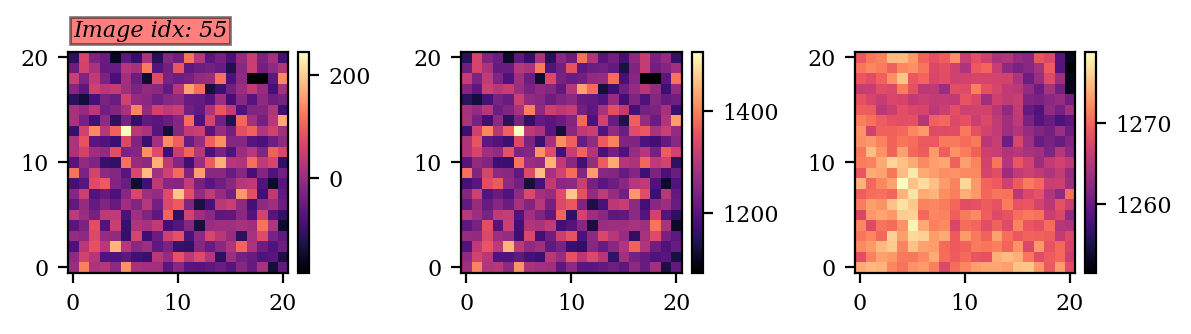

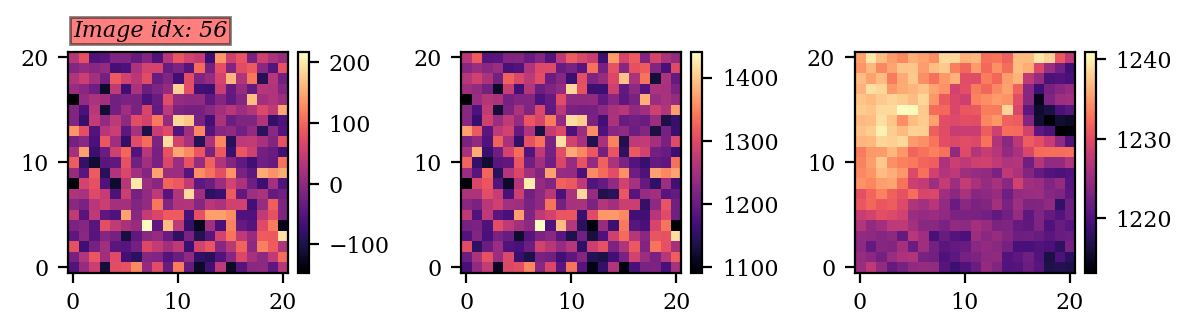

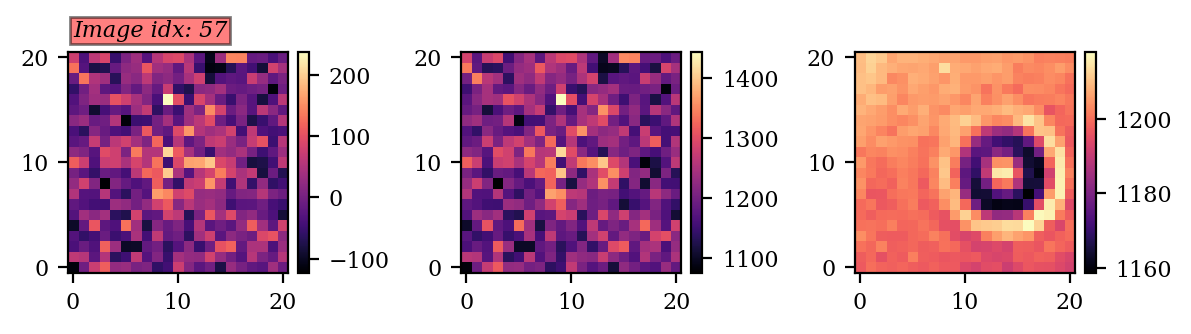

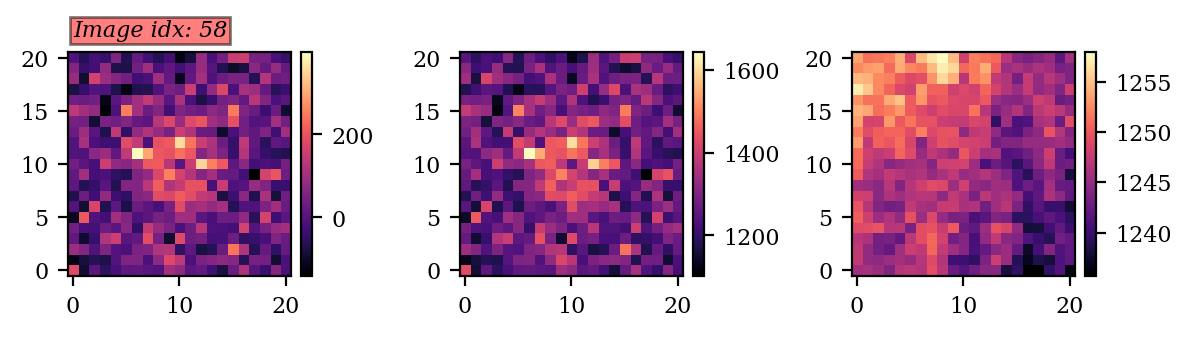

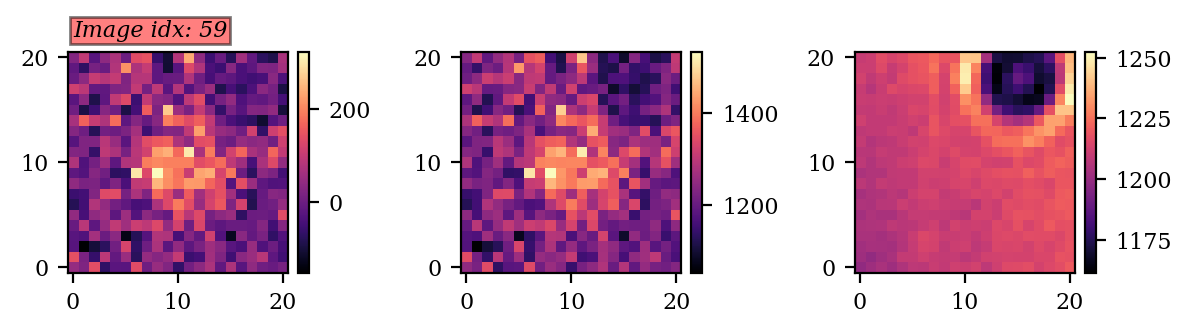

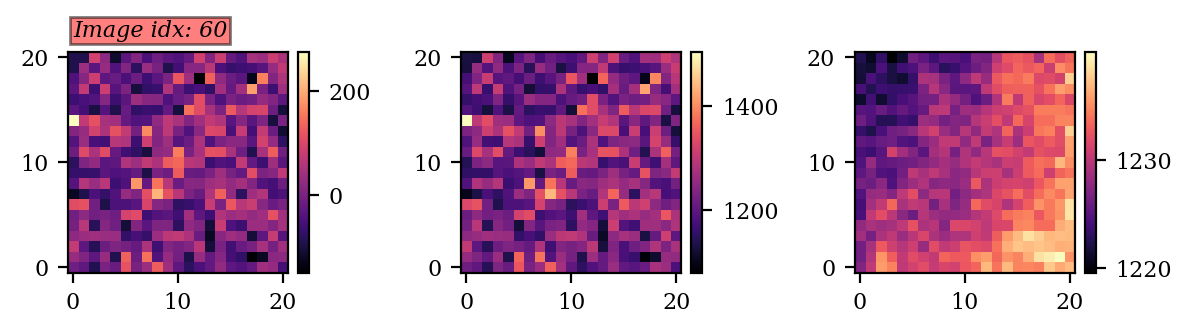

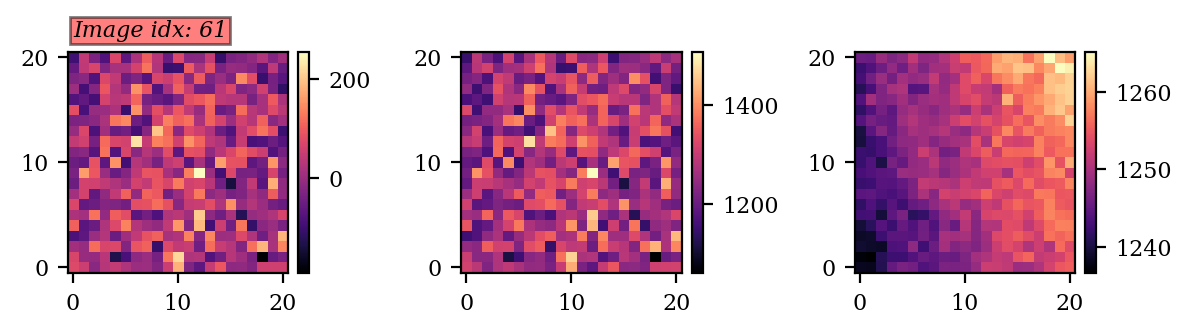

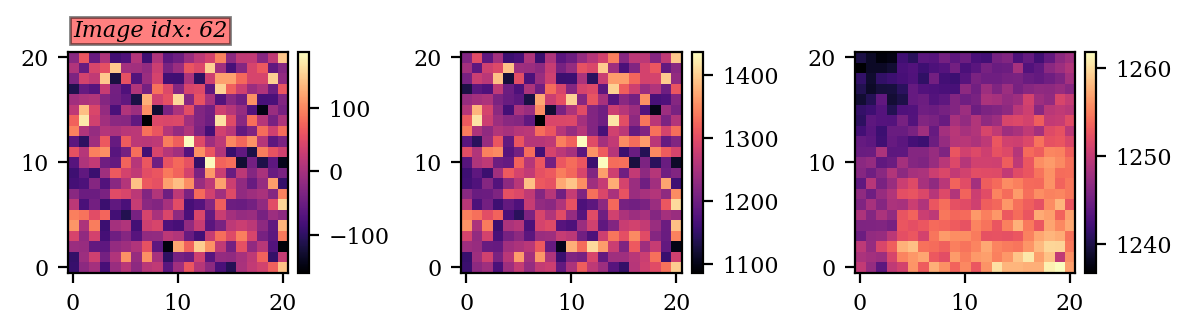

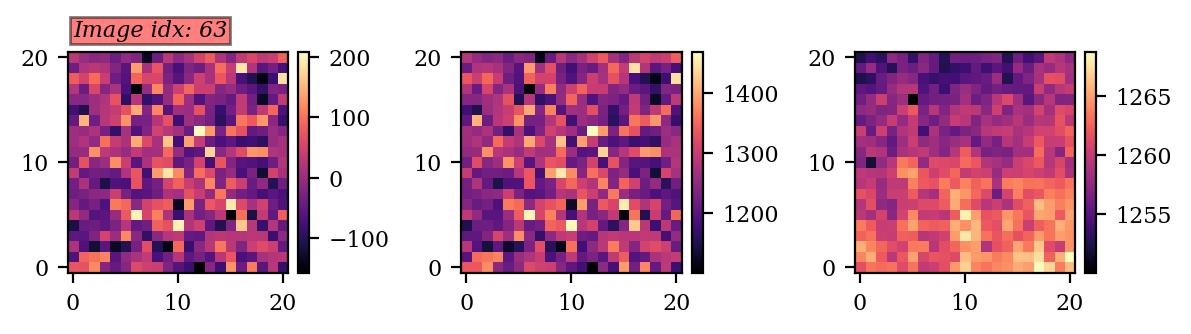

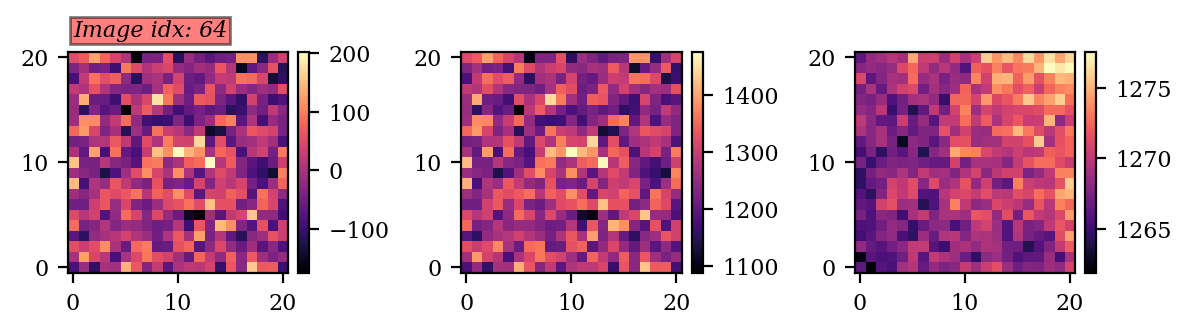

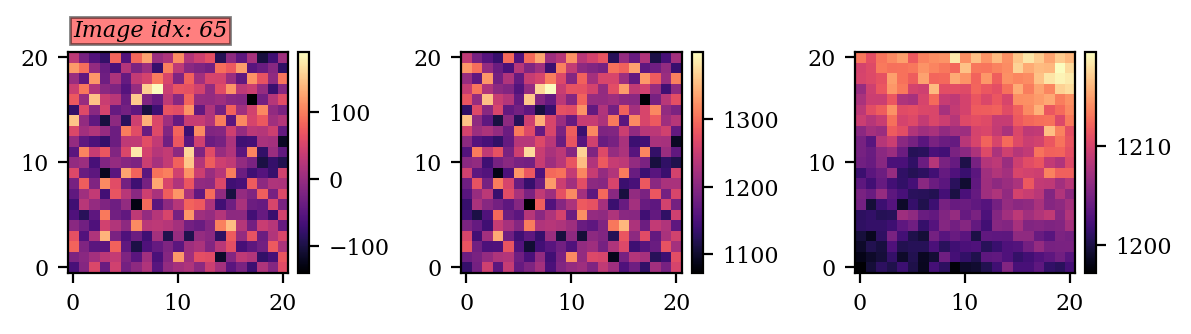

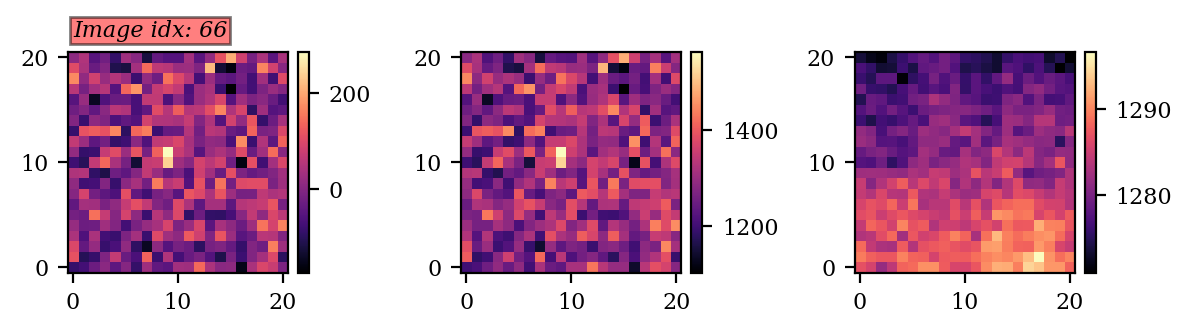

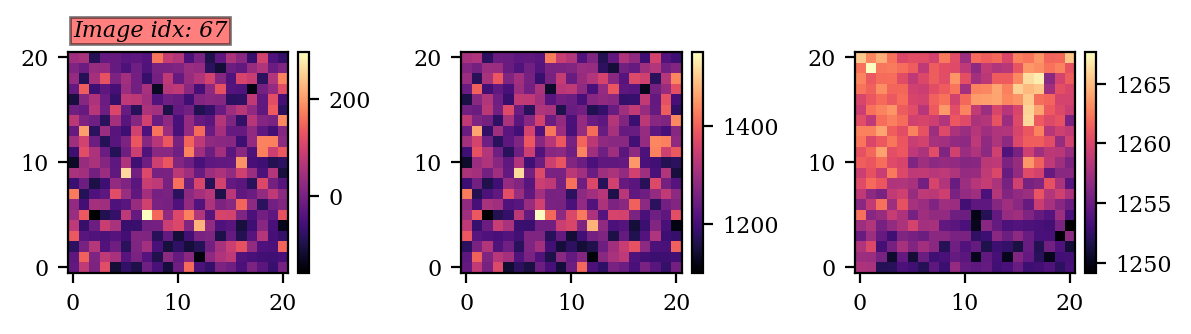

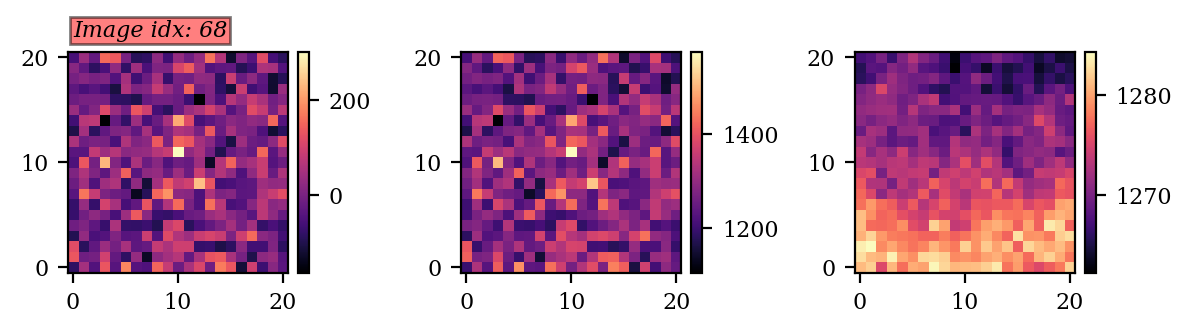

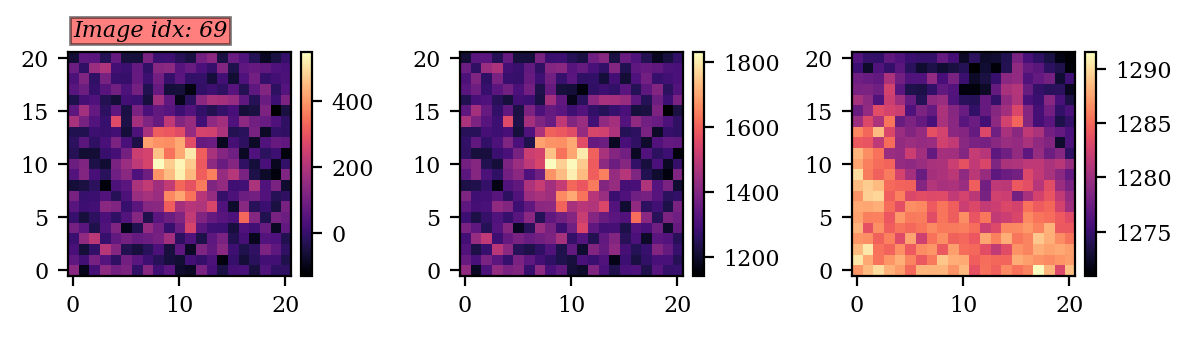

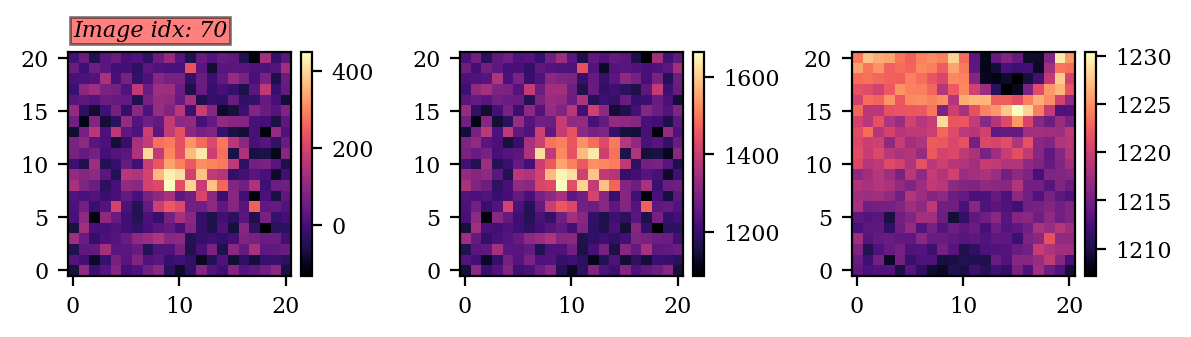

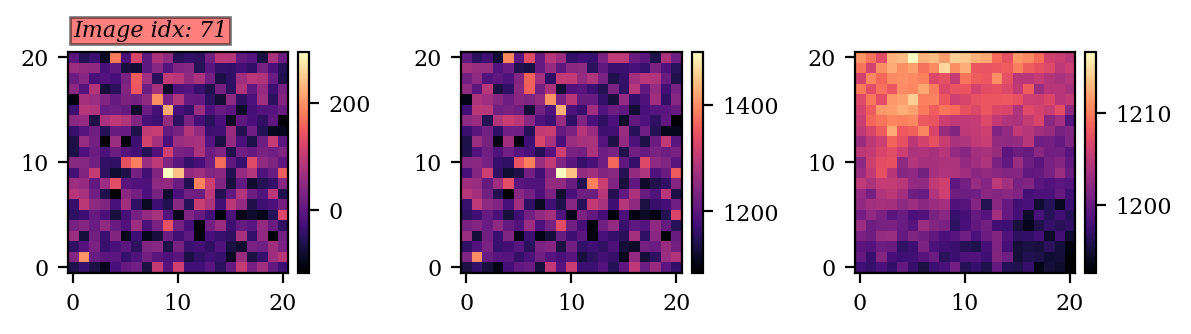

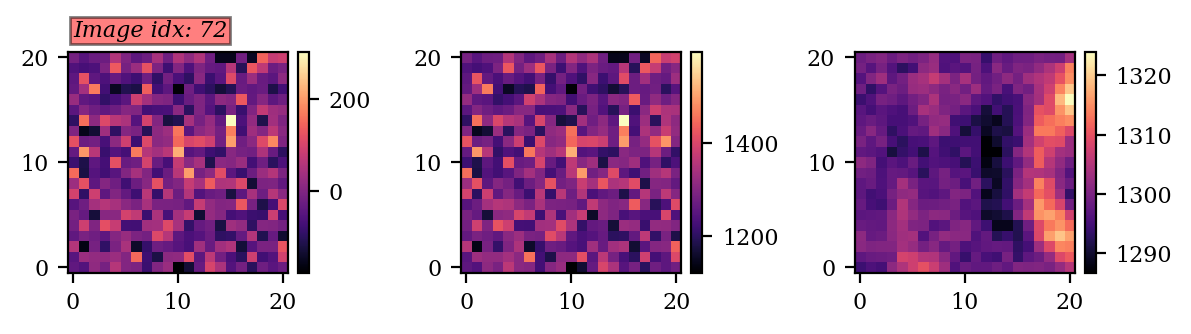

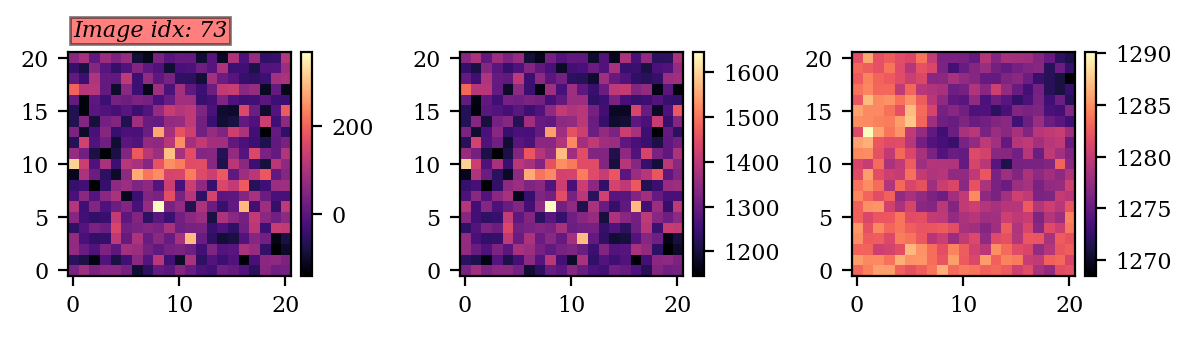

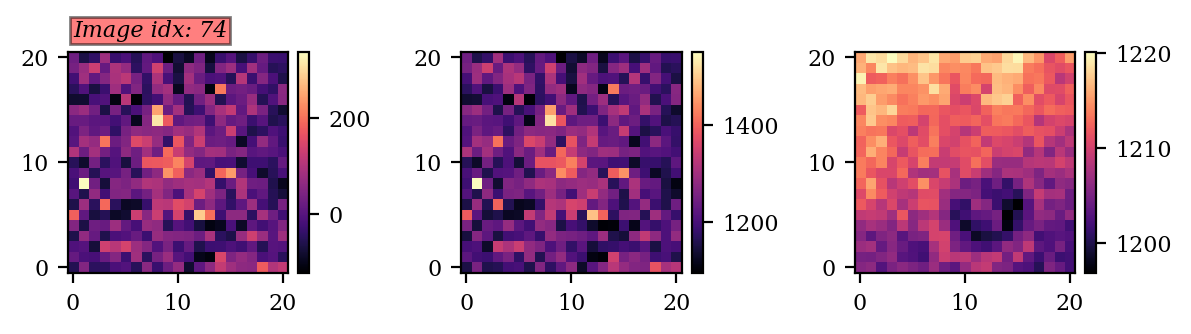

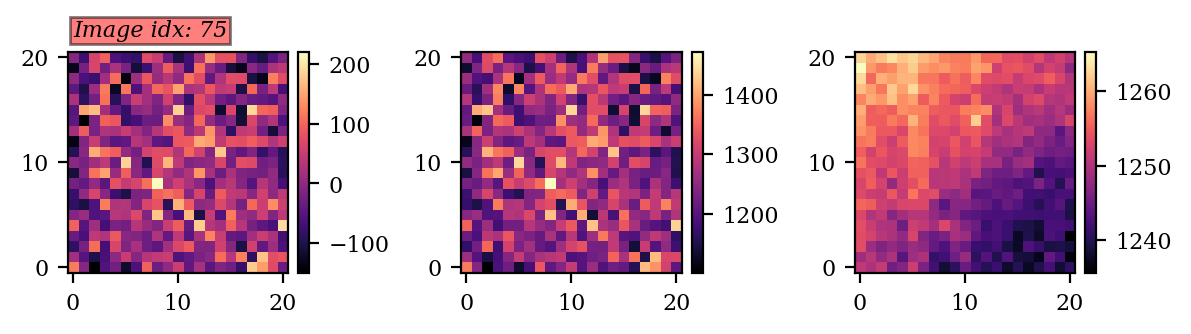

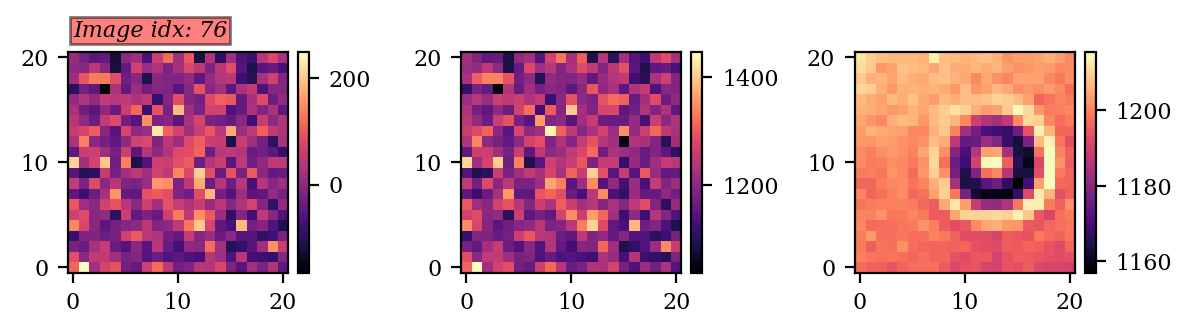

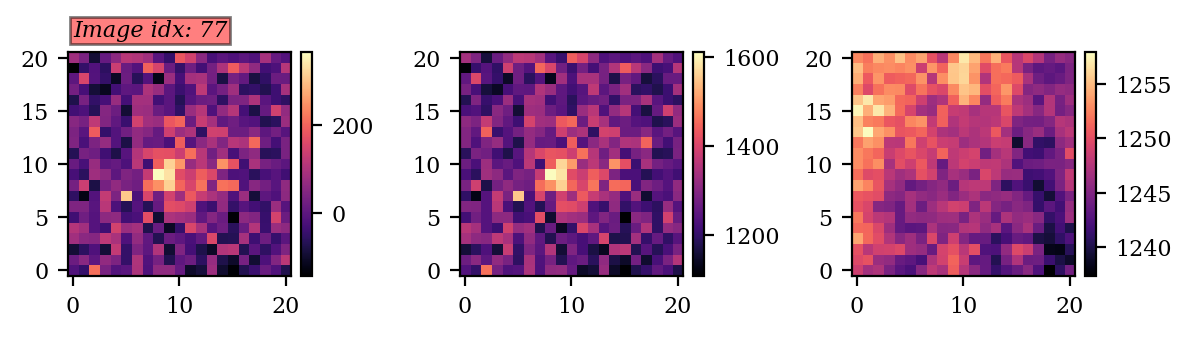

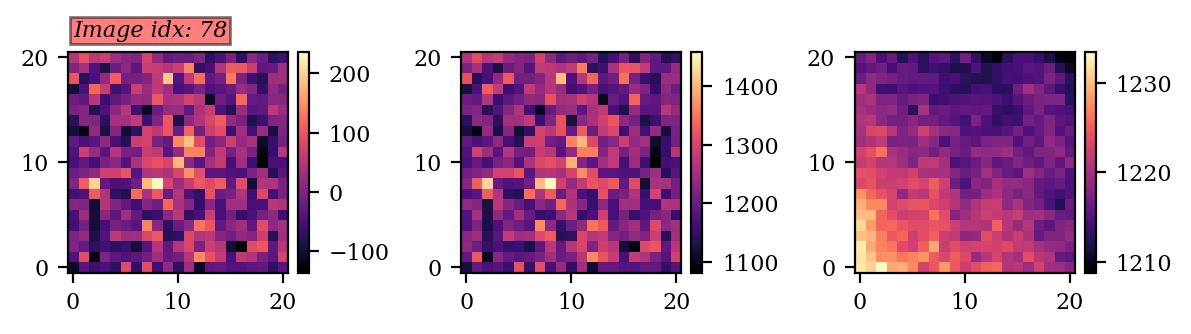

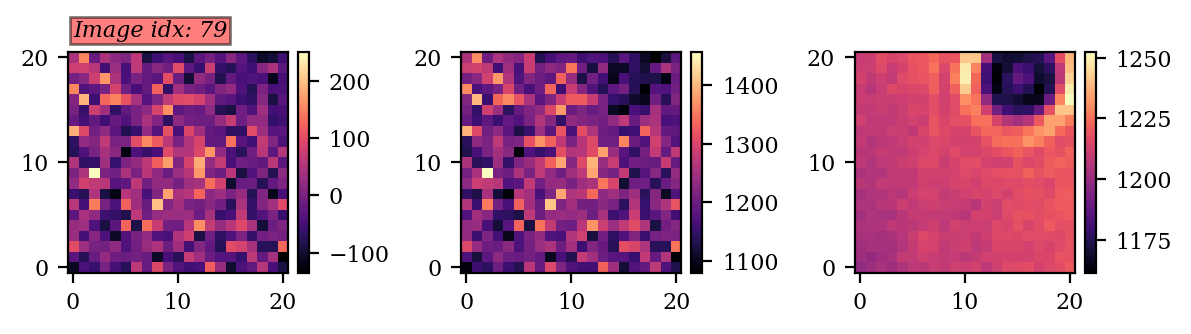

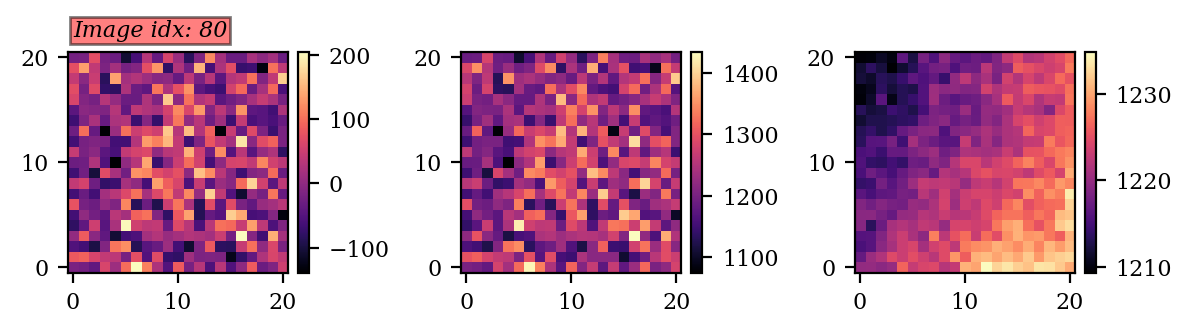

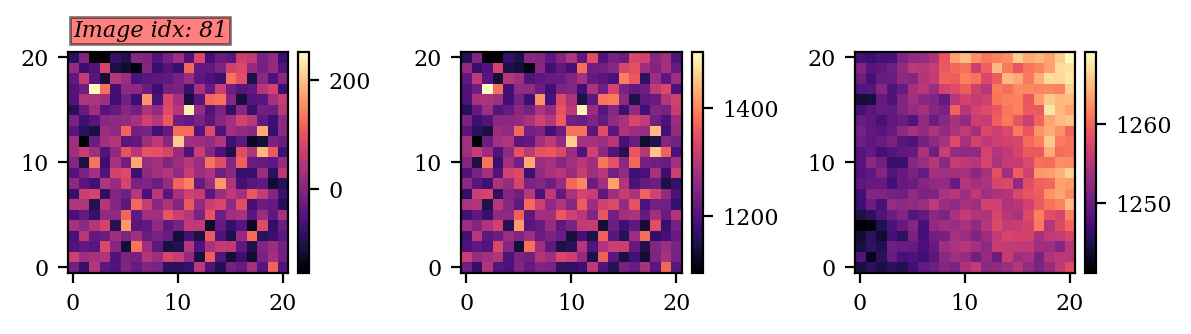

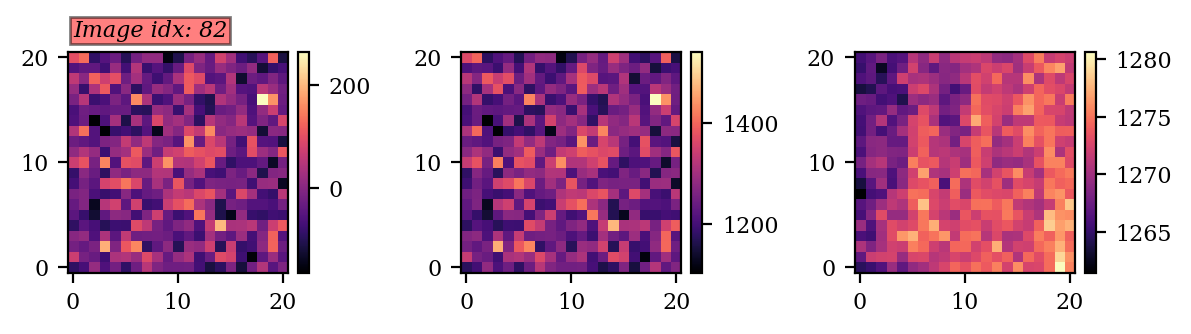

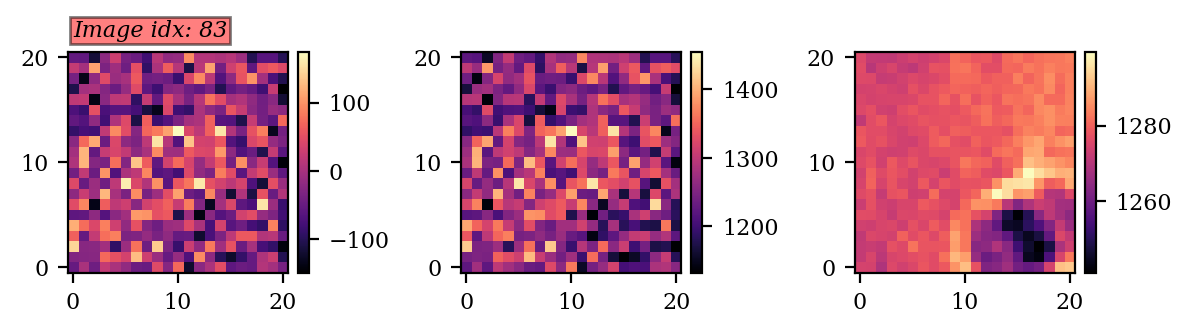

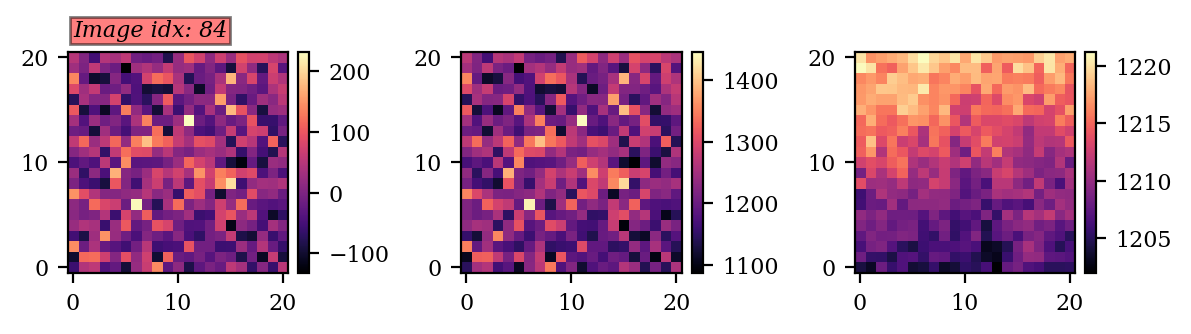

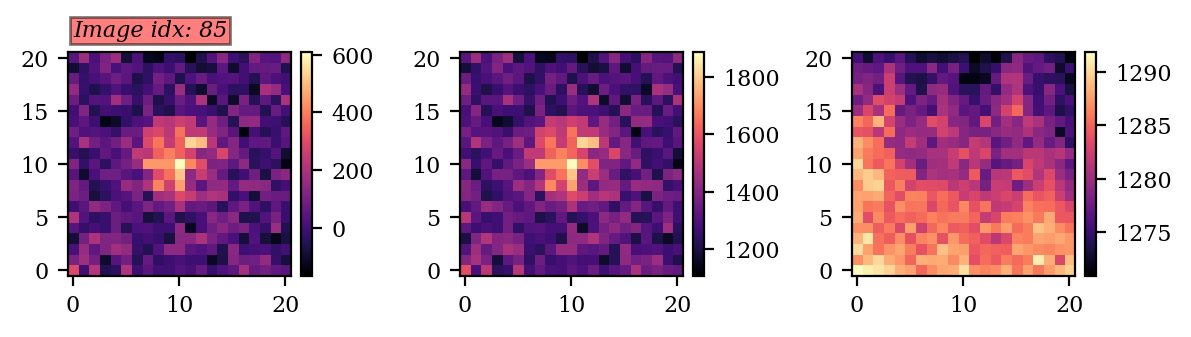

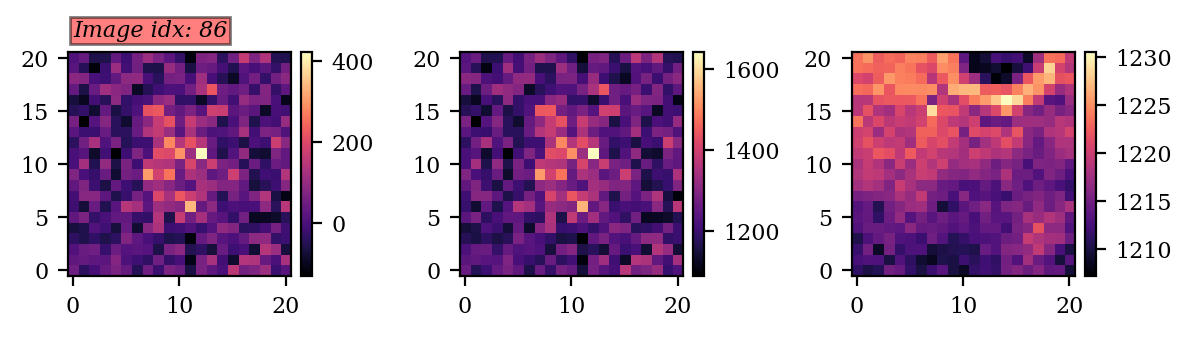

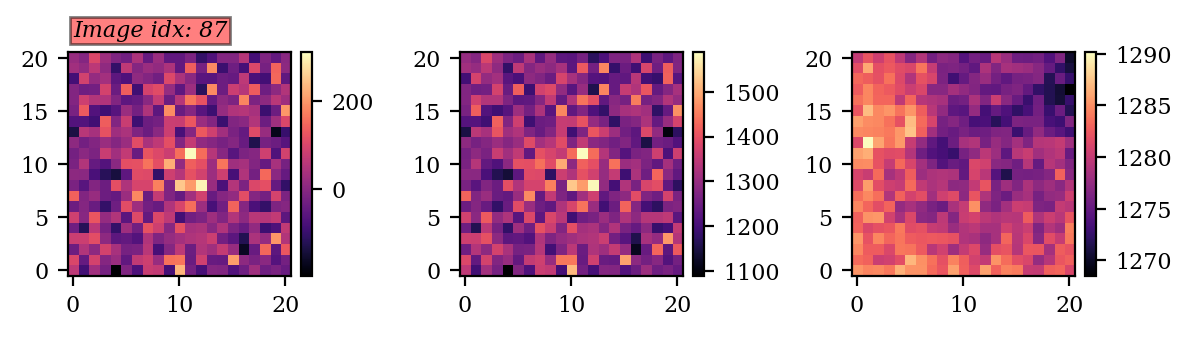

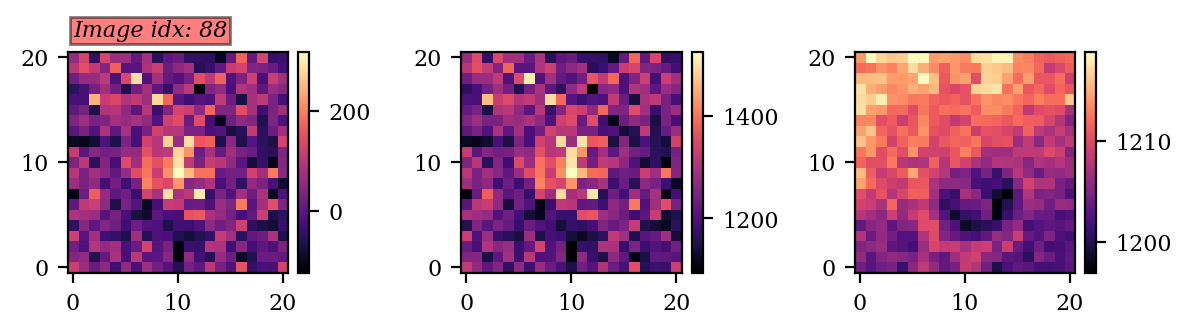

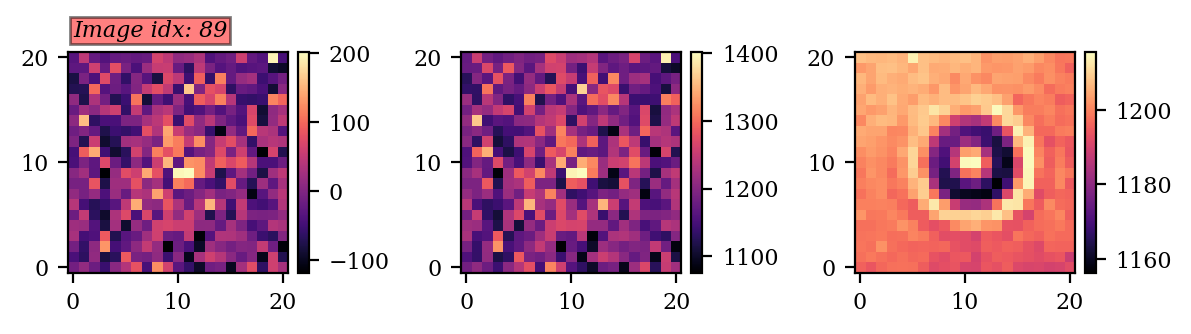

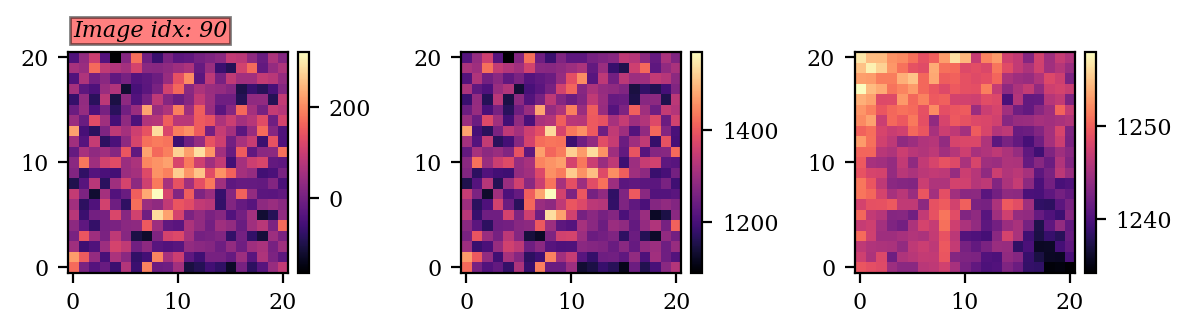

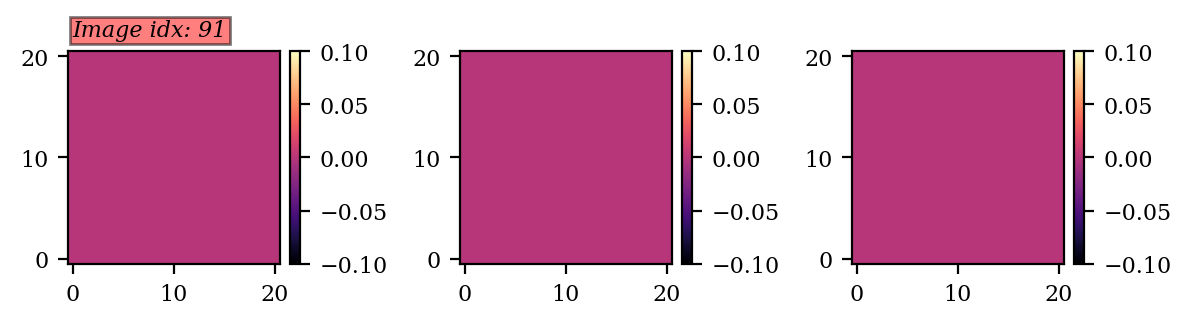

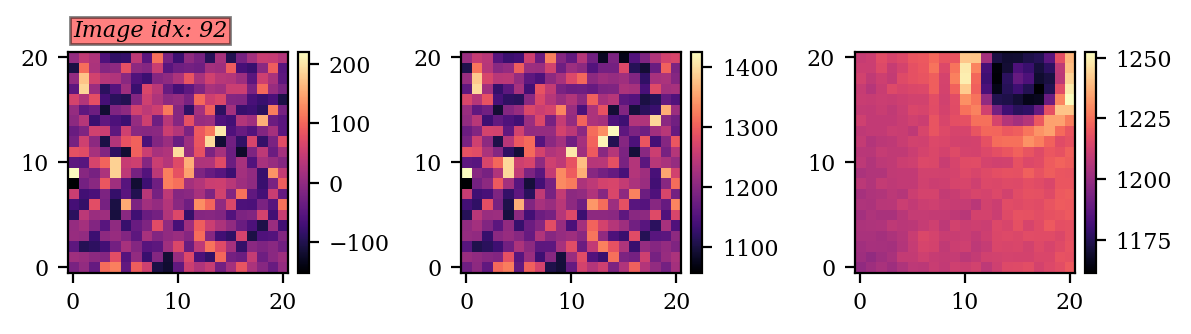

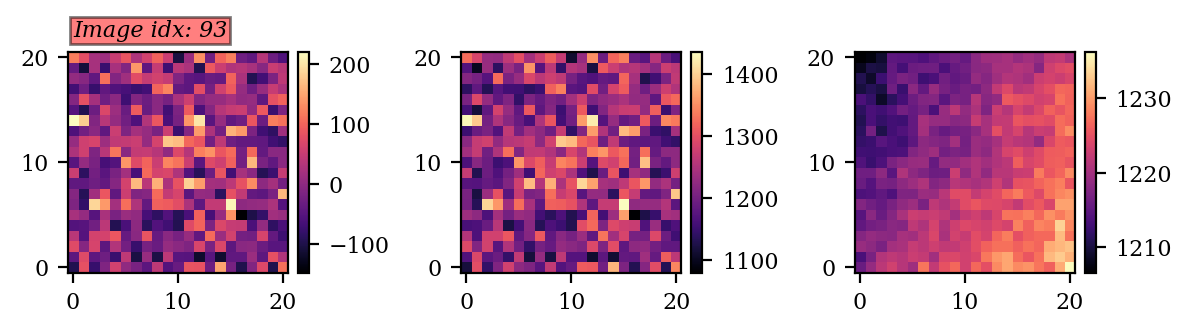

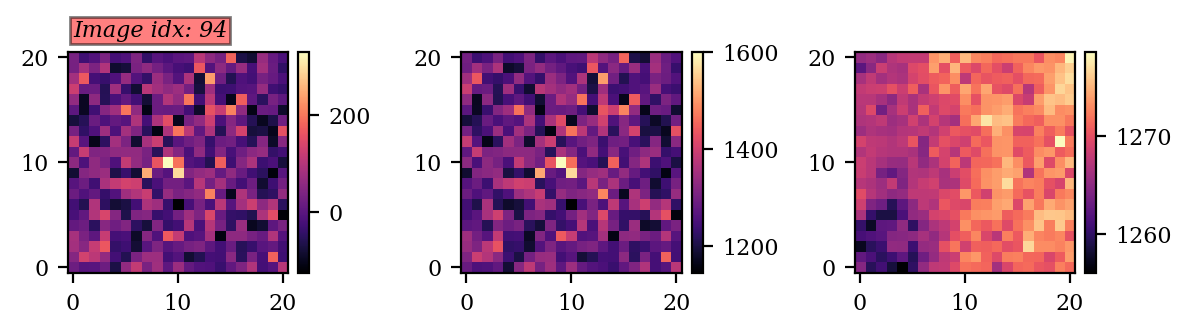

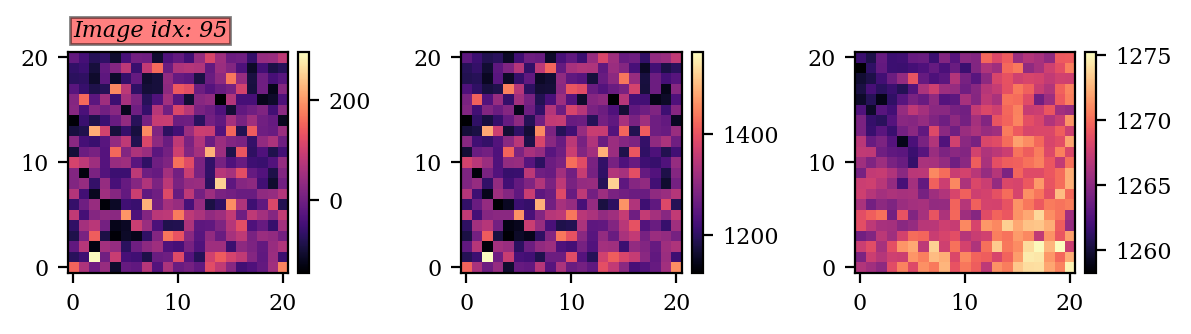

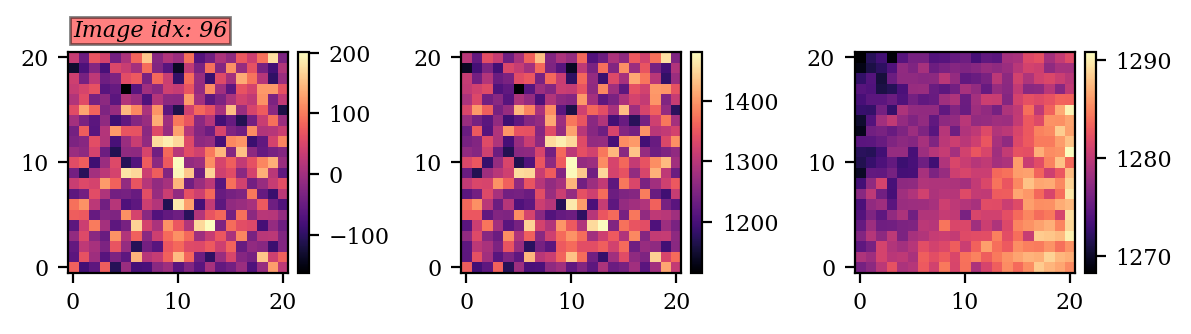

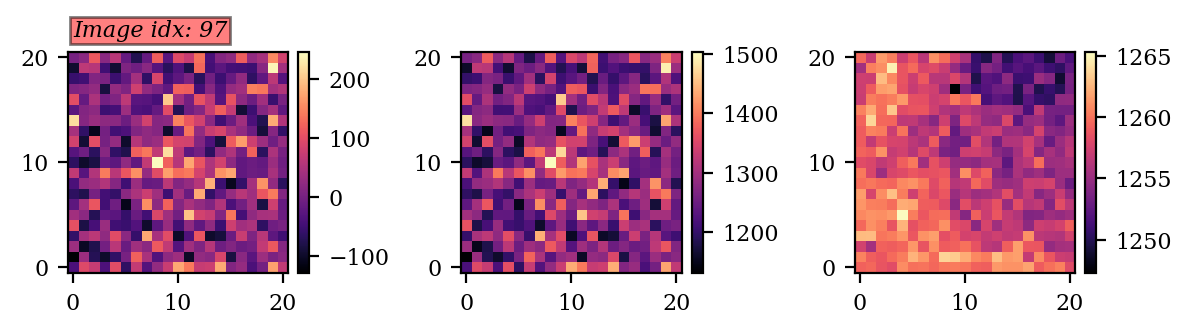

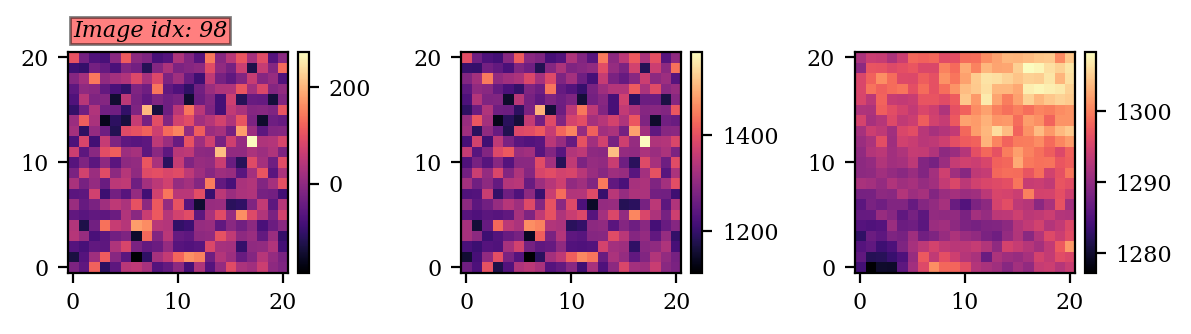

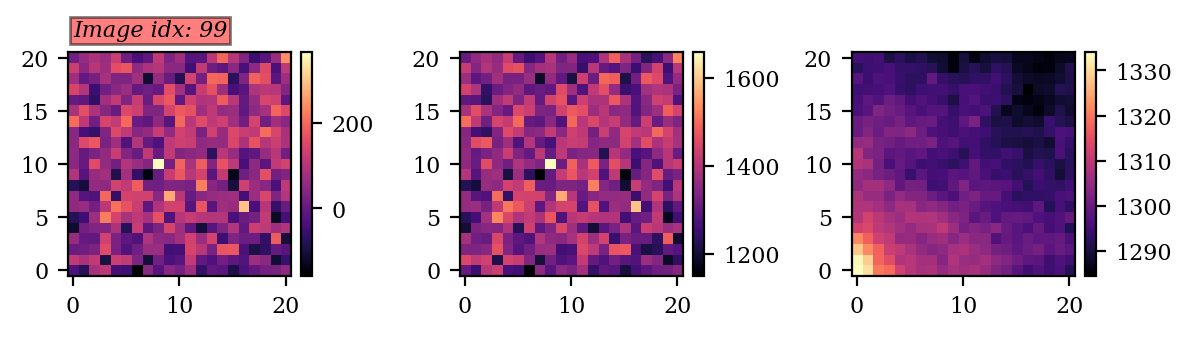

In [123]:

for i in range(41,100,1):

    fig, axs = plt.subplots(
        ncols=3,
        dpi=200,
        figsize=(6,2)
        
        )
    
    for ax_idx, name in zip(
        [0,1,2], ["bgsub_img", "raw_img", "bg_img"]):

        img1 = axs[ax_idx].imshow(mat_images[name][...,i])
        if ax_idx is 0:
            axs[ax_idx].text(
                0, 22, f'Image idx: {i}', 
                style='italic',
                bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 1}
                   )
        ## Add colorbar
        divider = make_axes_locatable(axs[ax_idx])
        cax1 = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(img1, cax=cax1)
   
    plt.tight_layout(h_pad=1)
    

nanoparticle is 80 nm diameter sphere

In [124]:
# plt.imshow(noisy_images[1].reshape(21,21))

## Time to try fitting a molecule
Image 26 looks like a good candidate. 

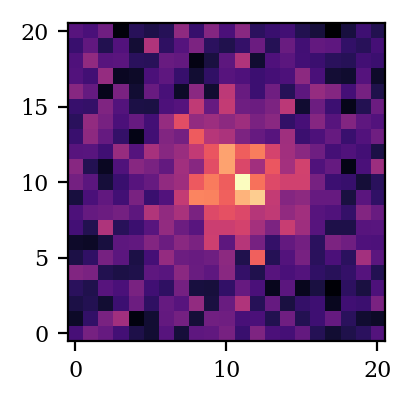

In [137]:
plt.figure(
#     figsize=(3,3), 
    dpi =200
) 
ax = plt.axes()
ax.imshow(mat_images['bgsub_img'][...,26])

In [188]:
exp_obs_pts = diffi.observation_points(0, 48*20, 0, 48*20, 21)*10**-7 ## cm_per_m

In [190]:
exp_fit_inst = fit.FittingTools(exp_obs_pts)

In [191]:
exp_fit_inst.calculate_max_xy(
    np.asarray([mat_images['bgsub_img'][...,26].ravel()]))

[array([480.]), array([528.])]

In [192]:
exp_fit_inst.calculate_apparent_centroids(
    np.asarray([mat_images['bgsub_img'][...,26].ravel()]))

array([[482.26576903],
       [500.22669049]])

In [202]:
import scipy.optimize as opt
m_per_nm = fit.m_per_nm
class RealFittingTools(fit.FittingTools):
    """ Slightly modified FittingTools class for convenience in fitting real data
        I was motivated to write this beacuse I can the covarience for plotting fits"""
    def __init__(self, images):
        fit.FittingTools.__init__(self, images)
        
    def fit_model(self, images):
        """ calculate index of maximum in each image. """
        num_of_images = images.shape[0]

        apparent_centroids_xy = np.zeros((num_of_images,2))

        max_positions = self.calculate_max_xy(images)

        for i in np.arange(num_of_images):
            x0 = max_positions[0][i]
            y0 = max_positions[1][i]
            params0 = (1,x0,y0, 100, 100, 0,0)
            args=tuple(images[i]/np.max(images[i]))
            fit_gaussian = opt.least_squares(self.misloc_data_minus_model, params0, args=args)
            resulting_fit_params = fit_gaussian['x']
            fit_result = self.twoD_Gaussian(
                (self.obs_points[1]/m_per_nm, self.obs_points[2]/m_per_nm), ## tuple of meshed (x,y) values
                *resulting_fit_params
                )

        return resulting_fit_params, fit_result   ## returns [x_cen(s), y_cen(s)]


In [203]:
exp_fit_inst = RealFittingTools(exp_obs_pts)
best_fit_params, best_fit = exp_fit_inst.fit_model(
    np.asarray([mat_images['bgsub_img'][...,26].ravel()]))

In [204]:
best_fit_params

array([ 6.92816818e-01,  4.82265769e+02,  5.00226690e+02,  1.39403844e+02,
        1.48578338e+02, -1.15791514e-01,  5.93217962e-03])

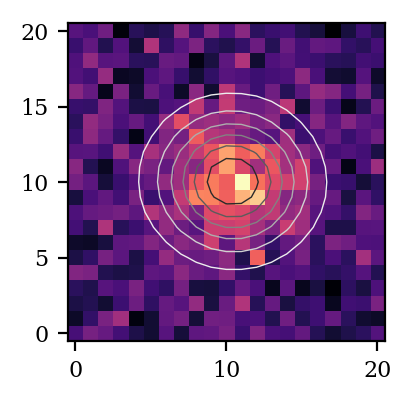

In [209]:
image = mat_images['bgsub_img'][...,26].ravel()

plt.figure(
#     figsize=(3,3), 
    dpi=200
) 
ax = plt.axes()

ax.imshow(image.reshape(21,21))

ax.contour(
    range(0,21),
    range(0,21),
    best_fit.reshape(exp_obs_pts[-2].shape),
    cmap='Greys',
    linewidths=0.5,
    )

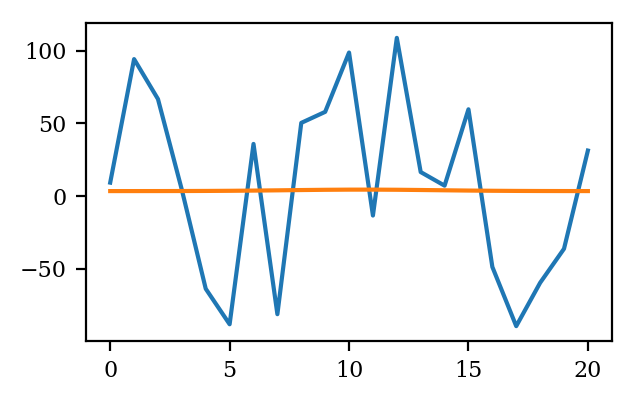

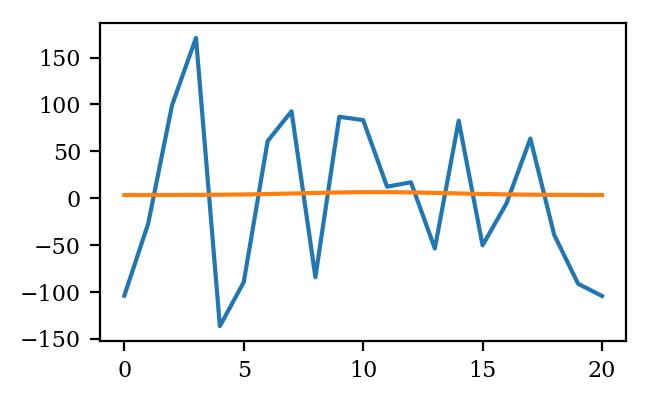

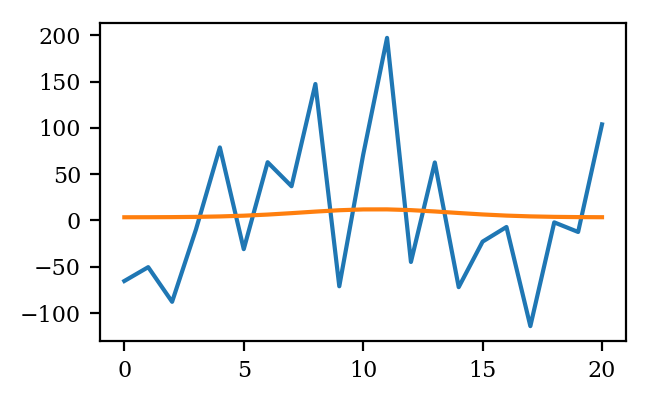

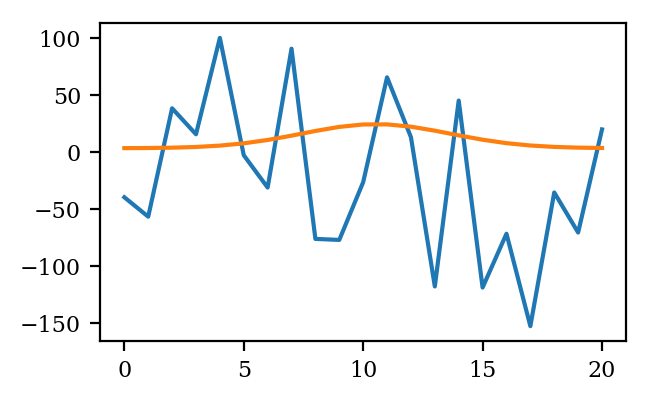

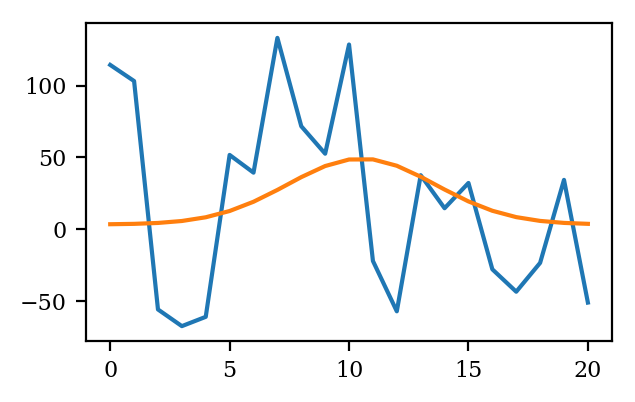

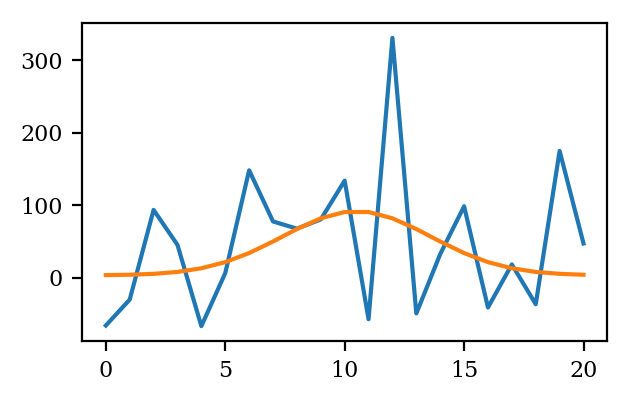

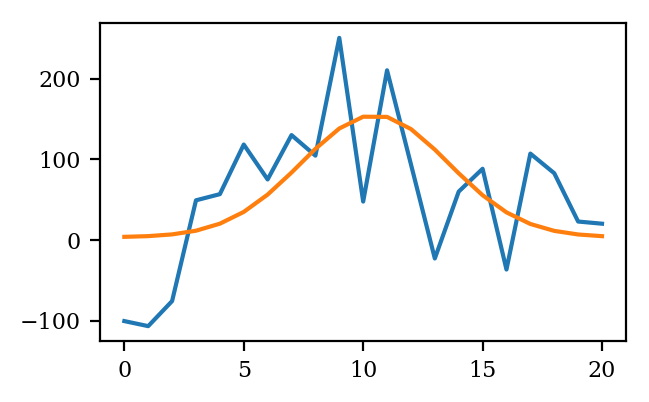

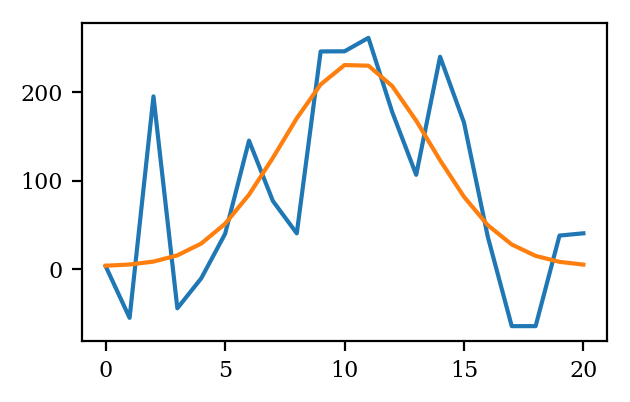

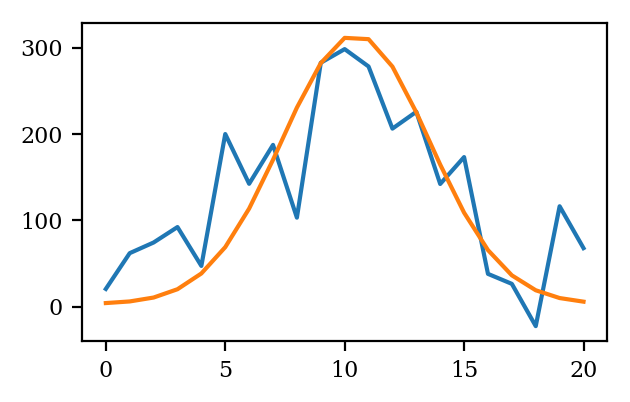

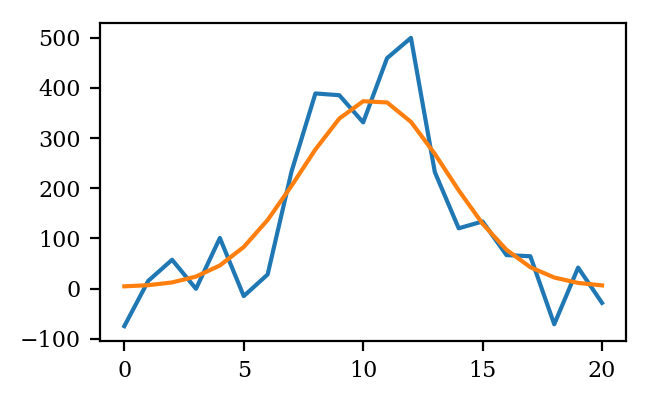

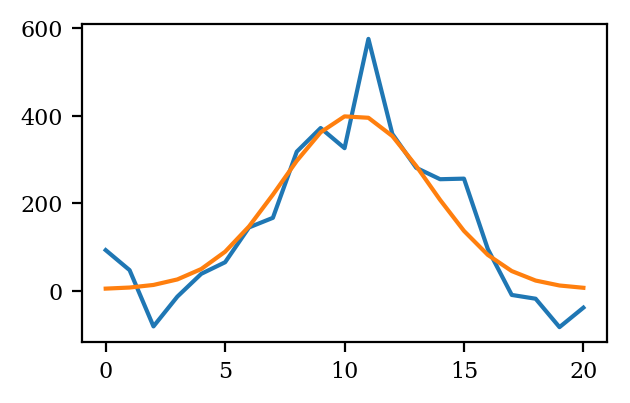

In [218]:
for i in range(11):
    plt.figure(dpi=200)
    plt.plot(image.reshape(21,21)[i])
    plt.plot(best_fit.reshape(exp_obs_pts[-2].shape)[i]*np.max(image))